 # Explanatory Data Analysis & Advanced Visualization (Baby Names Dataset)

## First Inspection: The most popular Names in 2018

1. __Load__ and __inspect__ the dataset "us_baby_names.csv". __Save__ the DataFrame in __df__.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.float_format = '{:.2f}'.format

In [2]:
df = pd.read_csv("us_baby_names.csv")
df

,Year,Name,Gender,Count
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746
...,...,...,...,...
1957041,2018,Zylas,M,5
1957042,2018,Zyran,M,5
1957043,2018,Zyrie,M,5
1957044,2018,Zyron,M,5


In [3]:
df.Gender = df.Gender.astype("category")

In [4]:
df.nunique()

Year        139
Name      98400
Gender        2
Count     13720
dtype: int64

2. Find the most popular __Baby Girl Names__ in __2018__. 

In [5]:
df.loc[(df.Year == 2018) & (df.Gender == "F")].head(10)

,Year,Name,Gender,Count
1925013,2018,Emma,F,18688
1925014,2018,Olivia,F,17921
1925015,2018,Ava,F,14924
1925016,2018,Isabella,F,14464
1925017,2018,Sophia,F,13928
1925018,2018,Charlotte,F,12940
1925019,2018,Mia,F,12642
1925020,2018,Amelia,F,12301
1925021,2018,Harper,F,10582
1925022,2018,Evelyn,F,10376


3. Find the most popular __Baby Boy Names__ in __2018__.

In [6]:
df.loc[(df.Year == 2018) & (df.Gender == "M")].Name.head(10)

1943042        Liam
1943043        Noah
1943044     William
1943045       James
1943046      Oliver
1943047    Benjamin
1943048      Elijah
1943049       Lucas
1943050       Mason
1943051       Logan
Name: Name, dtype: object

4. __Create__ the function most_pop(year, gender, n) that returns the __n__ most popular __M/F__ Names in the __year XYZ__.

In [7]:
def most_pop(year, gender, n):
    return df[(df.Year == year) & (df.Gender == gender)].nlargest(n, "Count")
# get the nth nlargest in the "Count" column, where (df.Year == year) & (df.Gender == gender)

In [8]:
most_pop(n = 10, gender = "M", year = 2018)

,Year,Name,Gender,Count
1943042,2018,Liam,M,19837
1943043,2018,Noah,M,18267
1943044,2018,William,M,14516
1943045,2018,James,M,13525
1943046,2018,Oliver,M,13389
1943047,2018,Benjamin,M,13381
1943048,2018,Elijah,M,12886
1943049,2018,Lucas,M,12585
1943050,2018,Mason,M,12435
1943051,2018,Logan,M,12352


In [9]:
most_pop(n = 10, gender = "F", year = 2018)

,Year,Name,Gender,Count
1925013,2018,Emma,F,18688
1925014,2018,Olivia,F,17921
1925015,2018,Ava,F,14924
1925016,2018,Isabella,F,14464
1925017,2018,Sophia,F,13928
1925018,2018,Charlotte,F,12940
1925019,2018,Mia,F,12642
1925020,2018,Amelia,F,12301
1925021,2018,Harper,F,10582
1925022,2018,Evelyn,F,10376


## Evergreen Names (1880 - 2018)

5. Find those __Evergreen Boy Names__ that are in __1880 and 2018__ among the most popular Boy Names (__Top 20__).

In [10]:
m_1880 = most_pop(n = 20, gender = "M", year = 1880)
m_1880

,Year,Name,Gender,Count
942,1880,John,M,9655
943,1880,William,M,9532
944,1880,James,M,5927
945,1880,Charles,M,5348
946,1880,George,M,5126
947,1880,Frank,M,3242
948,1880,Joseph,M,2632
949,1880,Thomas,M,2534
950,1880,Henry,M,2444
951,1880,Robert,M,2415


In [11]:
m_2018 = most_pop(n = 20, gender = "M", year = 2018)
m_2018

,Year,Name,Gender,Count
1943042,2018,Liam,M,19837
1943043,2018,Noah,M,18267
1943044,2018,William,M,14516
1943045,2018,James,M,13525
1943046,2018,Oliver,M,13389
1943047,2018,Benjamin,M,13381
1943048,2018,Elijah,M,12886
1943049,2018,Lucas,M,12585
1943050,2018,Mason,M,12435
1943051,2018,Logan,M,12352


In [12]:
m_1880[["Name", "Count"]].merge(m_2018[["Name", "Count"]], on = "Name", suffixes = ("_2018", "_1880"))
# on = "Name" create columns from the two df that are not merged. 

,Name,Count_2018,Count_1880
0,William,9532,14516
1,James,5927,13525
2,Henry,2444,10649


In [13]:
m_1880[["Name", "Count"]]

,Name,Count
942,John,9655
943,William,9532
944,James,5927
945,Charles,5348
946,George,5126
947,Frank,3242
948,Joseph,2632
949,Thomas,2534
950,Henry,2444
951,Robert,2415


In [14]:
m_1880.loc[:, ["Name", "Count"]]

,Name,Count
942,John,9655
943,William,9532
944,James,5927
945,Charles,5348
946,George,5126
947,Frank,3242
948,Joseph,2632
949,Thomas,2534
950,Henry,2444
951,Robert,2415


In [15]:
pd.merge(m_1880.loc[:, ["Name", "Count"]], m_2018.loc[:, ["Name", "Count"]], 
         how = 'inner', on = 'Name', suffixes = ('_1880', '_2018'))

,Name,Count_1880,Count_2018
0,William,9532,14516
1,James,5927,13525
2,Henry,2444,10649


In [16]:
m_evergreen = pd.merge(m_1880, m_2018, how = 'inner', on = 'Name', 
         suffixes = ('_1880', '_2018')).drop(columns=['Year_1880', 'Year_2018','Gender_1880', 'Gender_2018'])
m_evergreen 
# Same

,Name,Count_1880,Count_2018
0,William,9532,14516
1,James,5927,13525
2,Henry,2444,10649


6. Find those __Evergreen Girl Names__ that are in __1880 and 2018__ among the most popular Girl Names (__Top 20__).

In [17]:
f_2018 = most_pop(n = 20, gender = "F", year = 2018)
f_2018

,Year,Name,Gender,Count
1925013,2018,Emma,F,18688
1925014,2018,Olivia,F,17921
1925015,2018,Ava,F,14924
1925016,2018,Isabella,F,14464
1925017,2018,Sophia,F,13928
1925018,2018,Charlotte,F,12940
1925019,2018,Mia,F,12642
1925020,2018,Amelia,F,12301
1925021,2018,Harper,F,10582
1925022,2018,Evelyn,F,10376


In [18]:
f_1880 = most_pop(n = 20, gender = "F", year = 1880)
f_1880

,Year,Name,Gender,Count
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746
5,1880,Margaret,F,1578
6,1880,Ida,F,1472
7,1880,Alice,F,1414
8,1880,Bertha,F,1320
9,1880,Sarah,F,1288


In [19]:
pd.merge(f_2018[["Name", "Count"]], f_1880[["Name", "Count"]], on = "Name", suffixes = ('_2018', '_1880'))

,Name,Count_2018,Count_1880
0,Emma,18688,2003
1,Elizabeth,8513,1939
2,Ella,8055,1156


In [20]:
f_evergreen = f_2018[["Name", "Count"]].merge(f_1880[["Name", "Count"]], 
                                how = "inner", 
                                on = "Name", 
                                suffixes = ("_2018", "_1880"))
f_evergreen
# Same

,Name,Count_2018,Count_1880
0,Emma,18688,2003
1,Elizabeth,8513,1939
2,Ella,8055,1156


## Advanced Data Aggregation

7. Create the following __aggregated DataFrame agg__ (you can see the first and last 5 rows):

In [21]:
df = pd.read_csv("us_baby_names.csv")

In [22]:
df

,Year,Name,Gender,Count
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746
...,...,...,...,...
1957041,2018,Zylas,M,5
1957042,2018,Zyran,M,5
1957043,2018,Zyrie,M,5
1957044,2018,Zyron,M,5


__How to interpret df1 (and the first observation Aaban, M):__<br>
- There are in total 114 Male Babies with the name Aaban (Total)<br>
- The combination/entry (Aaban, M) can be found in 11 different years (No_Year)<br>
- The combination/entry (Aaban, M) appeared in the year 2007 for the first time (First_Year)<br>
- The last appearance was in the year 2018 (Last_Year)<br>
- In the most popular year, (Aaban, M) appeared 16 times (Max_Count)

In [23]:
df1 = df.groupby(["Name", "Gender"]).agg(Total = ("Count", "sum"), 
                                   No_Year = ("Count", "count"),
                                   First_Year = ("Year", "min"),
                                   Last_Year = ("Year", "max"),
                                   Max_Count = ("Count", "max"))

In [24]:
df1

,,Total,No_Year,First_Year,Last_Year,Max_Count
Name,Gender,,,,,
Aaban,M,114,11,2007,2018,16
Aabha,F,35,5,2011,2016,9
Aabid,M,16,3,2003,2018,6
Aabidah,F,5,1,2018,2018,5
Aabir,M,10,2,2016,2018,5
...,...,...,...,...,...,...
Zyvion,M,5,1,2009,2009,5
Zyvon,M,7,1,2015,2015,7
Zyyanna,F,6,1,2010,2010,6


8. __Reset__ the Index and create a RangeIndex.

In [25]:
df1.reset_index(inplace = True)

9. __Filter__ df1 for the combination (Mary, F)

In [26]:
df1[(df1.Name == "Mary") & (df1.Gender == "M")]

,Name,Gender,Total,No_Year,First_Year,Last_Year,Max_Count
68680,Mary,M,15165,131,1880,2014,340


## Most Popular Names of all Times

10. __Find__ the __10 most popular__ Male and Female Names of all Times (most popular in terms of total count).

In [27]:
df1

,Name,Gender,Total,No_Year,First_Year,Last_Year,Max_Count
0,Aaban,M,114,11,2007,2018,16
1,Aabha,F,35,5,2011,2016,9
2,Aabid,M,16,3,2003,2018,6
3,Aabidah,F,5,1,2018,2018,5
4,Aabir,M,10,2,2016,2018,5
...,...,...,...,...,...,...,...
109168,Zyvion,M,5,1,2009,2009,5
109169,Zyvon,M,7,1,2015,2015,7
109170,Zyyanna,F,6,1,2010,2010,6
109171,Zyyon,M,6,1,2014,2014,6


- Method 1

In [28]:
df1.groupby(['Gender']).apply(
lambda x:
    x.nlargest(10, "Total")
)

Name Gender    Total  No_Year  First_Year  Last_Year  \
Gender                                                                     
F      68679        Mary      F  4125675      139        1880       2018   
       30706   Elizabeth      F  1638349      139        1880       2018   
       79184    Patricia      F  1572016      135        1884       2018   
       46567    Jennifer      F  1467207      101        1916       2018   
       62973       Linda      F  1452668      139        1880       2018   
       11699     Barbara      F  1434397      139        1880       2018   
       67371    Margaret      F  1248985      139        1880       2018   
       94540       Susan      F  1121703      139        1880       2018   
       28575     Dorothy      F  1107635      139        1880       2018   
       87546       Sarah      F  1077746      139        1880       2018   
M      43582       James      M  5164280      139        1880       2018   
       48388        John      M  5124817      139        1880       2018   
       84427      Robert      M  4820129      139        1880       2018   
       71023     Michael      M  4362731      139        1880       2018   
       104615    William      M  4117369      139        1880       2018   
       24204       David      M  3621322      139        1880       2018   
       49192      Joseph      M  2613304      139        1880       2018   
       83864     Richard      M  2565301      139        1880       2018   
       18299     Charles      M  2392779      139        1880       2018   
       98544      Thomas      M  2311849      139        1880       2018   

               Max_Count  
Gender                    
F      68679       73985  
       30706       20744  
       79184       56442  
       46567       63603  
       62973       99689  
       11699       48792  
       67371       28467  
       94540       47402  
       28575       39999  
       87546       28484  
M      43582       94757  
       48388       88319  
       84427       91640  
       71023       92704  
       104615      66989  
       24204       86253  
       49192       32732  
       83864       58868  
       18299       40770  
       98544       48652

- Method 2

In [29]:
def most_pop_by_gen(gender, n):
    return df1[(df1.Gender == gender)].nlargest(n, "Total")

In [30]:
df2 = pd.merge(most_pop_by_gen(n = 10, gender = "M"), most_pop_by_gen(n = 10, gender = "F"), how = 'outer')
df2
# Same

,Name,Gender,Total,No_Year,First_Year,Last_Year,Max_Count
0,James,M,5164280,139,1880,2018,94757
1,John,M,5124817,139,1880,2018,88319
2,Robert,M,4820129,139,1880,2018,91640
3,Michael,M,4362731,139,1880,2018,92704
4,William,M,4117369,139,1880,2018,66989
5,David,M,3621322,139,1880,2018,86253
6,Joseph,M,2613304,139,1880,2018,32732
7,Richard,M,2565301,139,1880,2018,58868
8,Charles,M,2392779,139,1880,2018,40770
9,Thomas,M,2311849,139,1880,2018,48652


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

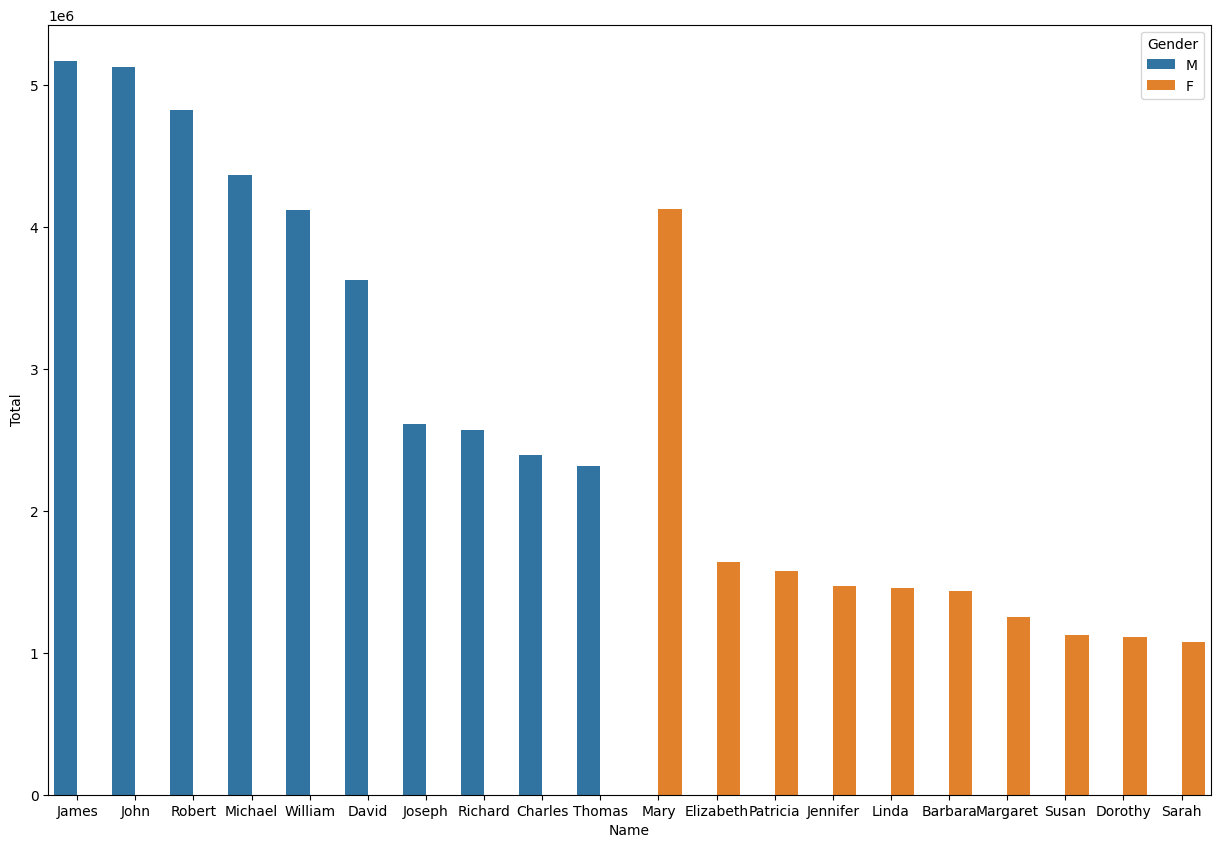

In [32]:
plt.figure(figsize = (15, 10))
sns.barplot(x = "Name", y = "Total", data = df2, hue = "Gender")
plt.show()

## General Trends over time (1880 - 2018)

11. __Count__ the total number of __registered Babies per Year__ and visualize.

- Method 1

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [34]:
df

,Year,Name,Gender,Count
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746
...,...,...,...,...
1957041,2018,Zylas,M,5
1957042,2018,Zyran,M,5
1957043,2018,Zyrie,M,5
1957044,2018,Zyron,M,5


In [35]:
df_babycount = df.groupby("Year").Count.sum().to_frame().reset_index()
df_babycount

,Year,Count
0,1880,201484
1,1881,192696
2,1882,221533
3,1883,216944
4,1884,243461
...,...,...
134,2014,3698914
135,2015,3691990
136,2016,3657797
137,2017,3561975


In [36]:
df_babycount.Year

0      1880
1      1881
2      1882
3      1883
4      1884
       ... 
134    2014
135    2015
136    2016
137    2017
138    2018
Name: Year, Length: 139, dtype: int64

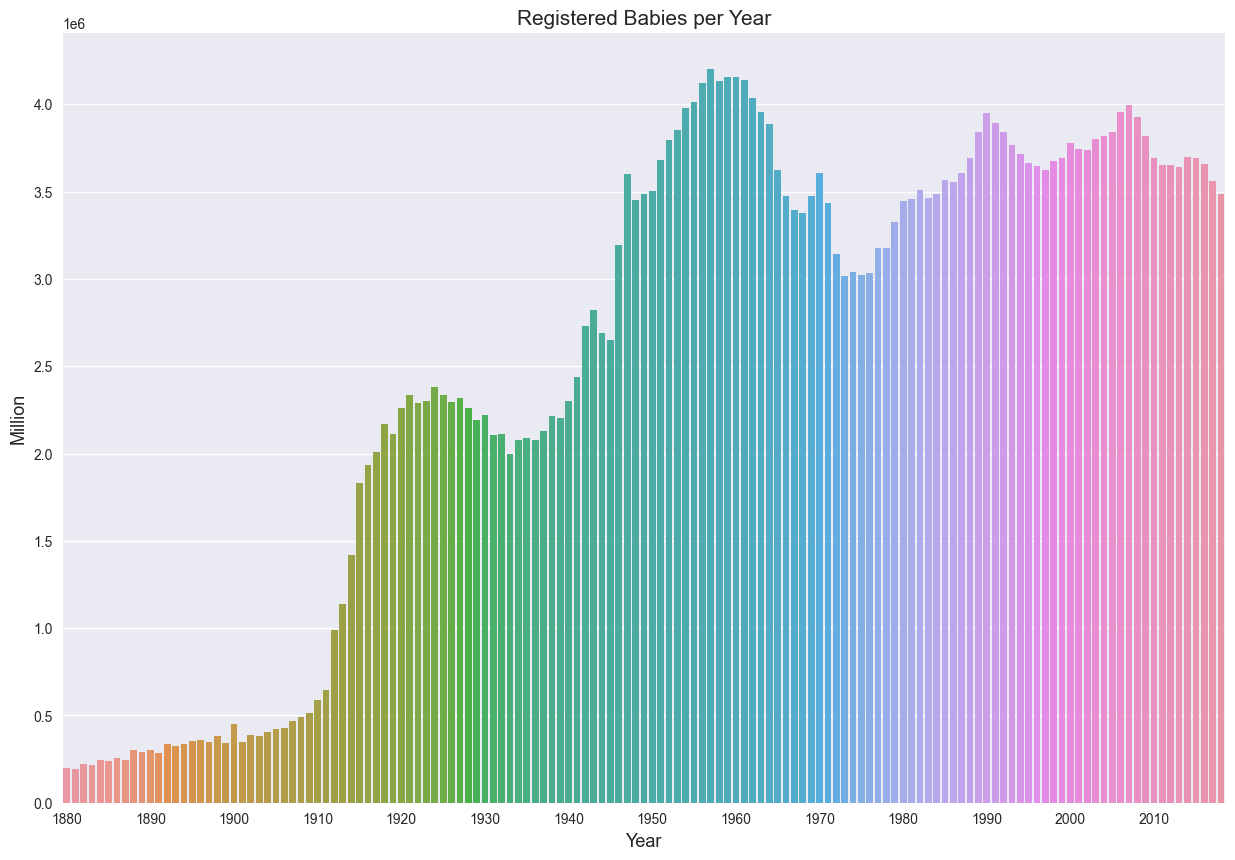

In [37]:
plt.figure(figsize = (15, 10))
sns.barplot(data = df_babycount, x = "Year", y = "Count")
plt.title("Registered Babies per Year", fontsize = 15)
plt.xlabel("Year", fontsize = 13)
plt.xticks(np.arange(0, 138, 10))
plt.ylabel("Million", fontsize = 13)
plt.show()

- Method 2

In [38]:
pd.options.display.float_format = '{:.0f}'.format

In [39]:
babies_per_year = df.groupby("Year").Count.sum()

In [40]:
babies_per_year

Year
1880     201484
1881     192696
1882     221533
1883     216944
1884     243461
         ...   
2014    3698914
2015    3691990
2016    3657797
2017    3561975
2018    3487353
Name: Count, Length: 139, dtype: int64

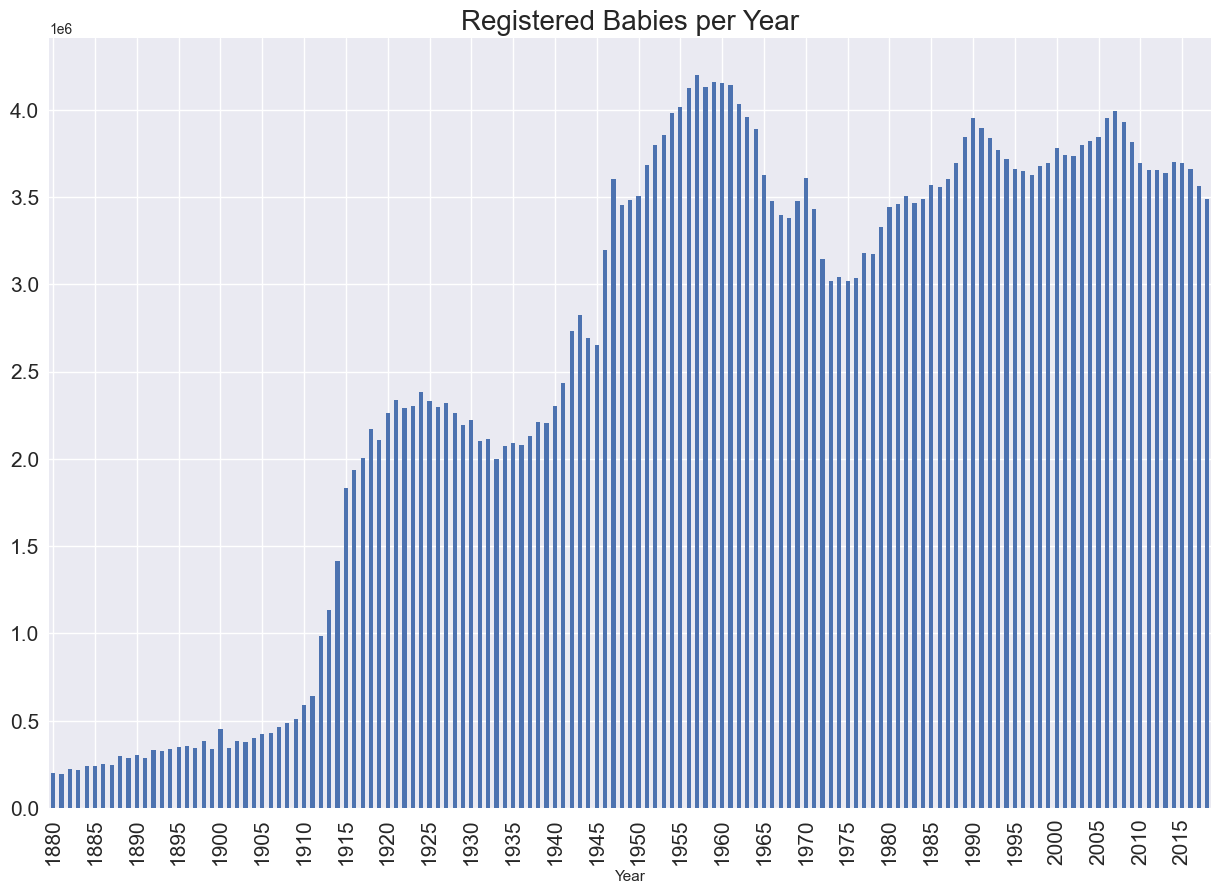

In [41]:
babies_per_year.plot(kind = "bar", y= "Count", figsize = (15, 10), fontsize = 15)
plt.xticks(ticks = (range(0, len(babies_per_year), 5)), labels =  range(1880, 2019, 5))
plt.title("Registered Babies per Year", fontsize = 20)
plt.show()

12. __Count__ the total number of __Unique Names per Year__ and visualize.

In [42]:
df

,Year,Name,Gender,Count
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746
...,...,...,...,...
1957041,2018,Zylas,M,5
1957042,2018,Zyran,M,5
1957043,2018,Zyrie,M,5
1957044,2018,Zyron,M,5


In [43]:
df.groupby(by = ["Year", "Name"])["Name"].nunique()#.count()#.to_frame().reset_index()

Year  Name  
1880  Aaron     1
      Ab        1
      Abbie     1
      Abbott    1
      Abby      1
               ..
2018  Zyron     1
      Zyrus     1
      Zyus      1
      Zyva      1
      Zzyzx     1
Name: Name, Length: 1786075, dtype: int64

In [44]:
df.groupby("Year").Name.count()
# male and female combined

Year
1880     2000
1881     1935
1882     2127
1883     2084
1884     2297
        ...  
2014    33243
2015    33121
2016    33010
2017    32590
2018    32033
Name: Name, Length: 139, dtype: int64

In [45]:
df3 = df.groupby(by = ["Year", "Name"])["Name"].nunique().groupby("Year").sum().to_frame().reset_index()
df3

,Year,Name
0,1880,1889
1,1881,1830
2,1882,2012
3,1883,1962
4,1884,2158
...,...,...
134,2014,30742
135,2015,30603
136,2016,30415
137,2017,30006


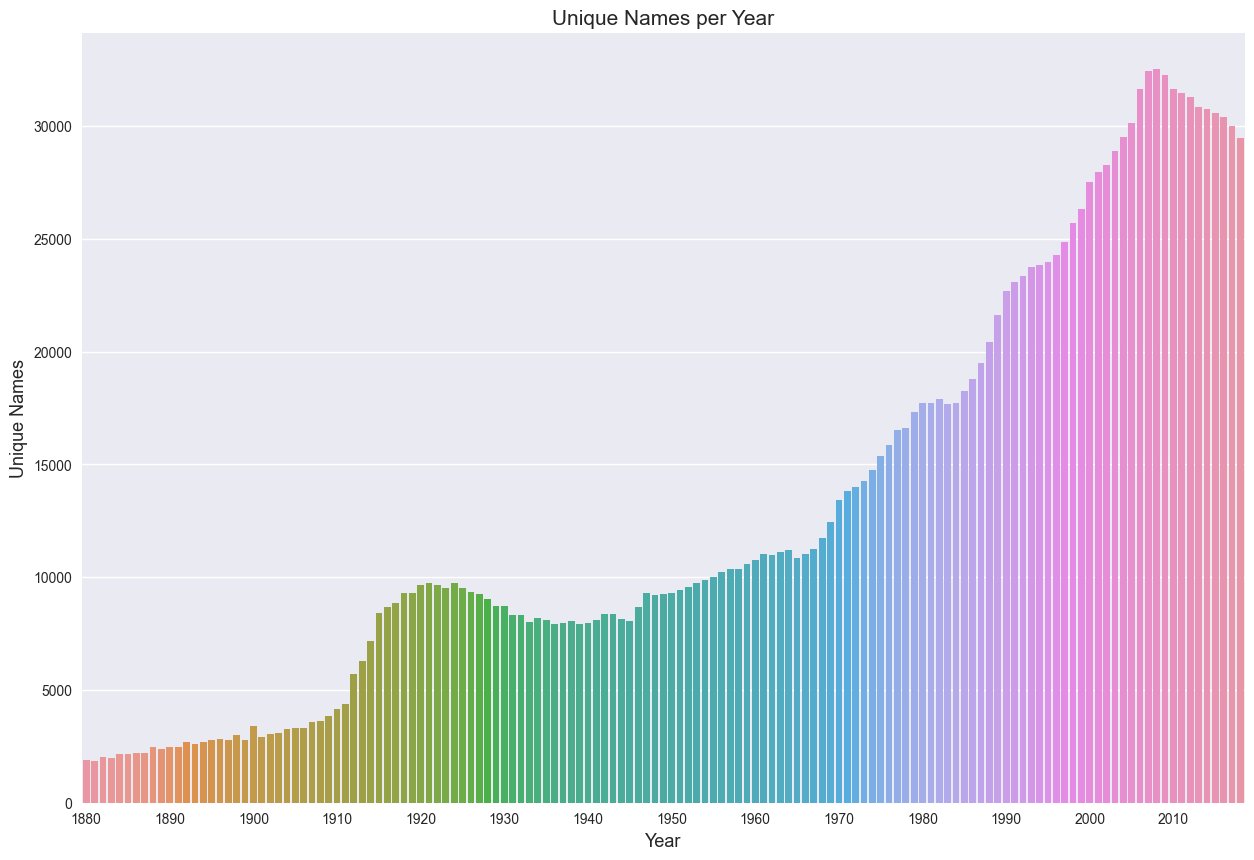

In [46]:
plt.figure(figsize = (15, 10))
sns.barplot(data = df3, x = "Year", y = "Name")
plt.title("Unique Names per Year", fontsize = 15)
plt.xlabel("Year", fontsize = 13)
plt.xticks(np.arange(0, 138, 10))
plt.ylabel("Unique Names", fontsize = 13)
plt.show()

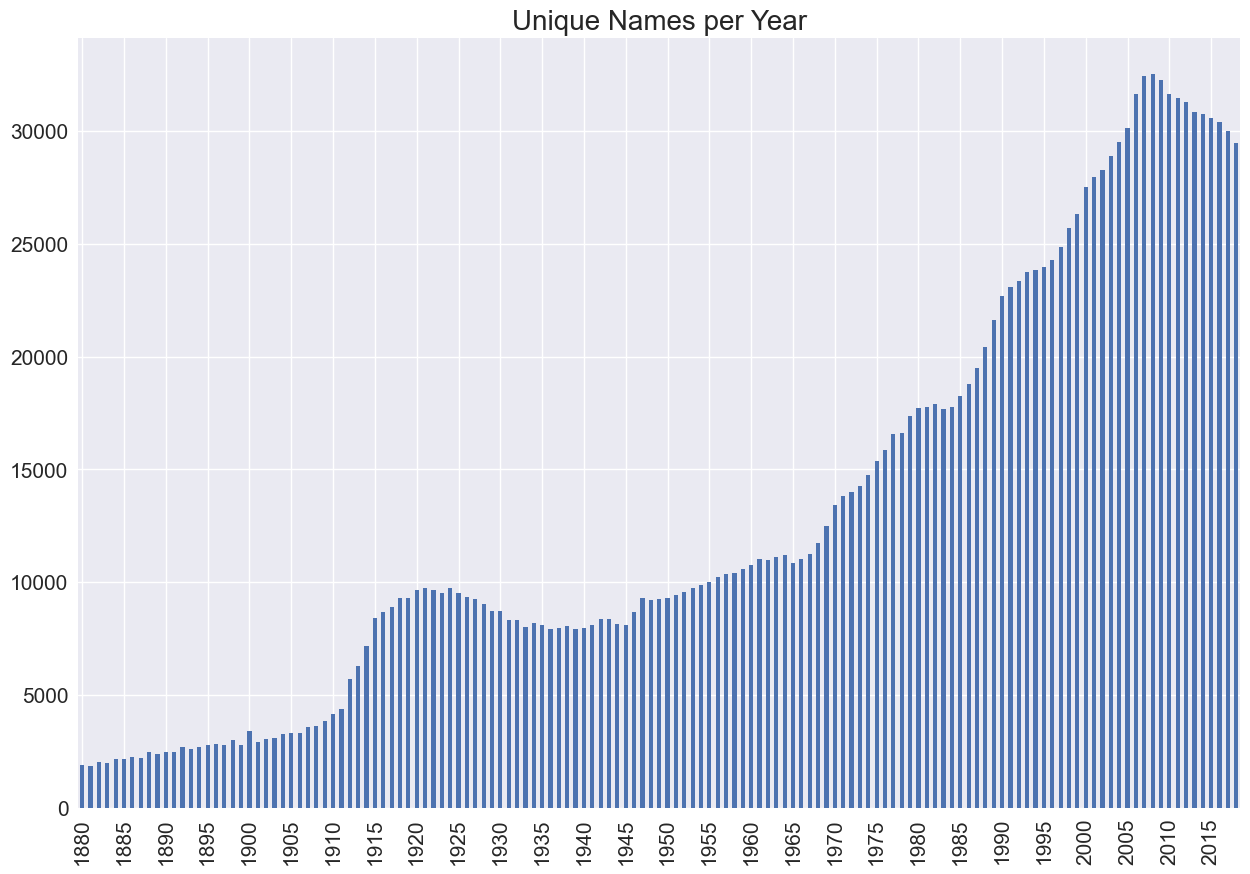

In [47]:
df3.plot(kind = "bar", y= "Name", figsize = (15, 10), fontsize = 15, legend = None)
plt.xticks(ticks = (range(0, len(df3), 5)), labels =  range(1880, 2019, 5))
plt.title("Unique Names per Year", fontsize = 20)
plt.show()

## Creating the Features "Popularity" and "Rank"

13. __Add__ the column __"Popularity"__ to df: <br> 

- Popularity in __babies per million__ (example: assume 2,000,000 registered Girl Names in 1950, thereof 100,000 Maries -> Popularity Score in 1950 for (Mary, F) is 100,000 / 2,000,000 * 1,000,000 = 50,000 per million.)  

In [48]:
df

,Year,Name,Gender,Count
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746
...,...,...,...,...
1957041,2018,Zylas,M,5
1957042,2018,Zyran,M,5
1957043,2018,Zyrie,M,5
1957044,2018,Zyron,M,5


In [49]:
df.groupby(["Year", "Gender"]).Count.sum()
# the number of registered name by gender in each year

Year  Gender
1880  F           90994
      M          110490
1881  F           91953
      M          100743
1882  F          107847
                 ...   
2016  M         1891585
2017  F         1719138
      M         1842837
2018  F         1686961
      M         1800392
Name: Count, Length: 278, dtype: int64

In [50]:
df.groupby(["Year", "Gender"]).Count.transform("sum")
# assign group sum to each and every row considering its respective group

0            90994
1            90994
2            90994
3            90994
4            90994
            ...   
1957041    1800392
1957042    1800392
1957043    1800392
1957044    1800392
1957045    1800392
Name: Count, Length: 1957046, dtype: int64

In [51]:
df.Count

0          7065
1          2604
2          2003
3          1939
4          1746
           ... 
1957041       5
1957042       5
1957043       5
1957044       5
1957045       5
Name: Count, Length: 1957046, dtype: int64

In [52]:
df.Count.div(df.groupby(["Year", "Gender"]).Count.transform("sum")).mul(1000000)

0         77642
1         28617
2         22012
3         21309
4         19188
           ... 
1957041       3
1957042       3
1957043       3
1957044       3
1957045       3
Name: Count, Length: 1957046, dtype: float64

In [53]:
df["Popularity"] = df.Count.div(df.groupby(["Year", "Gender"]).Count.transform("sum")).mul(1000000)

In [54]:
df

,Year,Name,Gender,Count,Popularity
0,1880,Mary,F,7065,77642
1,1880,Anna,F,2604,28617
2,1880,Emma,F,2003,22012
3,1880,Elizabeth,F,1939,21309
4,1880,Minnie,F,1746,19188
...,...,...,...,...,...
1957041,2018,Zylas,M,5,3
1957042,2018,Zyran,M,5,3
1957043,2018,Zyrie,M,5,3
1957044,2018,Zyron,M,5,3


14. __Add__ the column __"Rank"__ to df: <br> 

In [55]:
df["Rank"] = df.groupby(["Year", "Gender"]).Count.rank(ascending = False)

In [56]:
df

,Year,Name,Gender,Count,Popularity,Rank
0,1880,Mary,F,7065,77642,1
1,1880,Anna,F,2604,28617,2
2,1880,Emma,F,2003,22012,3
3,1880,Elizabeth,F,1939,21309,4
4,1880,Minnie,F,1746,19188,5
...,...,...,...,...,...,...
1957041,2018,Zylas,M,5,3,13042
1957042,2018,Zyran,M,5,3,13042
1957043,2018,Zyrie,M,5,3,13042
1957044,2018,Zyron,M,5,3,13042


In [57]:
df[(df.Year == 2018) & (df.Gender == "M")].head(60)

,Year,Name,Gender,Count,Popularity,Rank
1943042,2018,Liam,M,19837,11018,1
1943043,2018,Noah,M,18267,10146,2
1943044,2018,William,M,14516,8063,3
1943045,2018,James,M,13525,7512,4
1943046,2018,Oliver,M,13389,7437,5
1943047,2018,Benjamin,M,13381,7432,6
1943048,2018,Elijah,M,12886,7157,7
1943049,2018,Lucas,M,12585,6990,8
1943050,2018,Mason,M,12435,6907,9
1943051,2018,Logan,M,12352,6861,10


In [58]:
df[(df.Year == 2018) & (df.Gender == "M")].Popularity.sum()

999999.9999999999

## Visualizing Name Trends over Time

15. __Visualize__ Popularity and Rank of the Female name "Mary" over time.

In [59]:
df

,Year,Name,Gender,Count,Popularity,Rank
0,1880,Mary,F,7065,77642,1
1,1880,Anna,F,2604,28617,2
2,1880,Emma,F,2003,22012,3
3,1880,Elizabeth,F,1939,21309,4
4,1880,Minnie,F,1746,19188,5
...,...,...,...,...,...,...
1957041,2018,Zylas,M,5,3,13042
1957042,2018,Zyran,M,5,3,13042
1957043,2018,Zyrie,M,5,3,13042
1957044,2018,Zyron,M,5,3,13042


In [60]:
mary = df[(df.Name == "Mary") & (df.Gender == "F")]
mary.tail(60)

,Year,Name,Gender,Count,Popularity,Rank
560704,1959,Mary,F,54474,26927,1
572471,1960,Mary,F,51475,25457,1
584392,1961,Mary,F,47680,23632,1
596575,1962,Mary,F,43486,22113,2
608784,1963,Mary,F,41550,21559,2
621066,1964,Mary,F,40990,21633,2
633463,1965,Mary,F,34270,19416,2
645416,1966,Mary,F,28884,17072,3
657568,1967,Mary,F,25313,15333,4
669967,1968,Mary,F,21725,13245,6


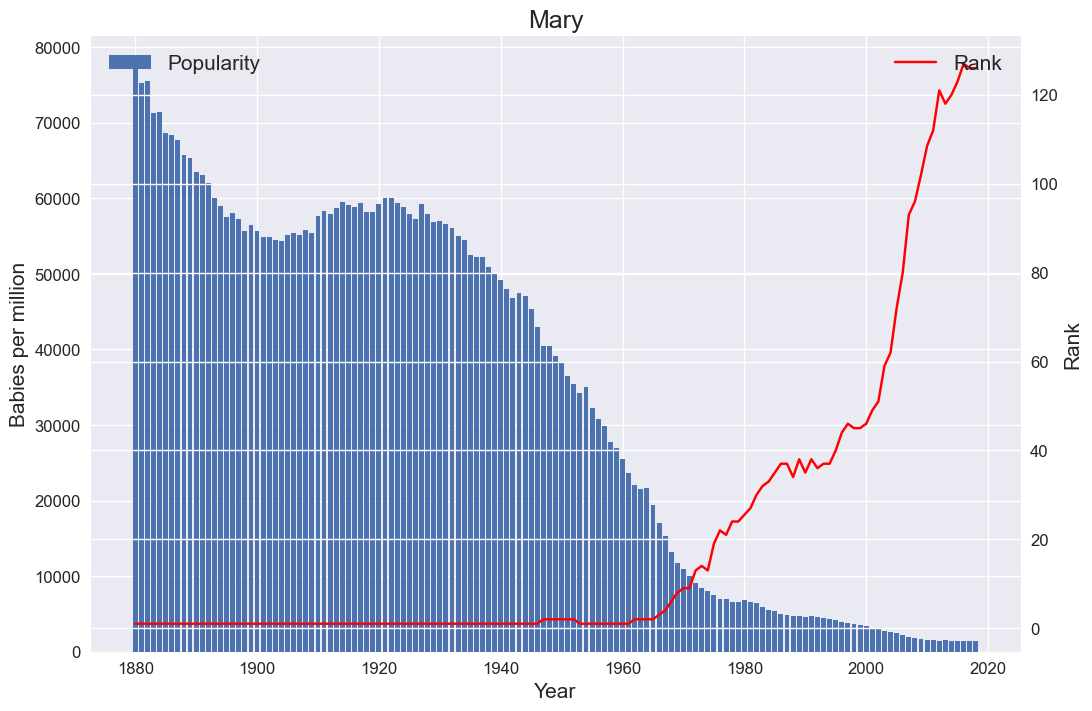

In [61]:
fig, ax1 = plt.subplots(figsize = (12, 8))
ax1.bar(x = mary.Year, height= mary.Popularity, label = "Popularity")
ax2 = ax1.twinx()
ax2.plot(mary.Year, mary.Rank, color = "red", label = "Rank")
ax1.set_xlabel("Year", fontsize = 15)
ax1.set_ylabel("Babies per million", fontsize = 15)
ax2.set_ylabel("Rank", fontsize = 15)
ax1.set_title("Mary", fontsize = 18)
ax1.tick_params(labelsize = 12)
ax2.tick_params(labelsize = 12)
ax1.legend(loc = 2, fontsize = 15)
ax2.legend(loc = 1, fontsize = 15)
plt.show()

In [62]:
def plot_name(name, gender, crit = "Popularity"):
    data = df.loc[(df.Name == name) & (df.Gender == gender), ["Name", "Gender", "Year", "Rank", crit]]
    data = data.set_index("Year")
    
    fig, ax1 = plt.subplots(figsize = (12, 8))
    ax1.bar(x = data.index, height= data[crit], label = crit)
    ax2 = ax1.twinx()
    ax2.plot(data.index, data.Rank, color = "red", label = "Rank")
    ax1.set_xlabel("Year", fontsize = 15)
    ax1.set_ylabel(crit, fontsize = 15)
    ax2.set_ylabel("Rank", fontsize = 15)
    ax1.set_title(name, fontsize = 18)
    ax1.tick_params(labelsize = 12)
    ax2.tick_params(labelsize = 12)
    ax1.legend(loc = 2, fontsize = 15) # upper left 
    ax2.legend(loc = 1, fontsize = 15) # upper right
    plt.show()

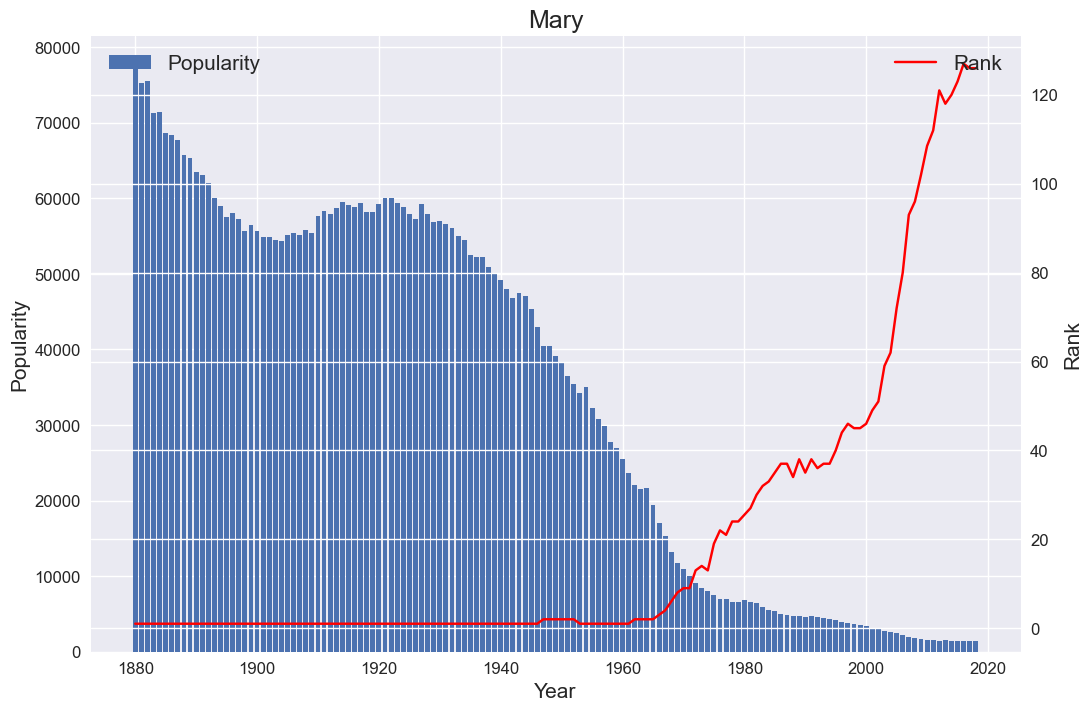

In [63]:
plot_name("Mary", "F")

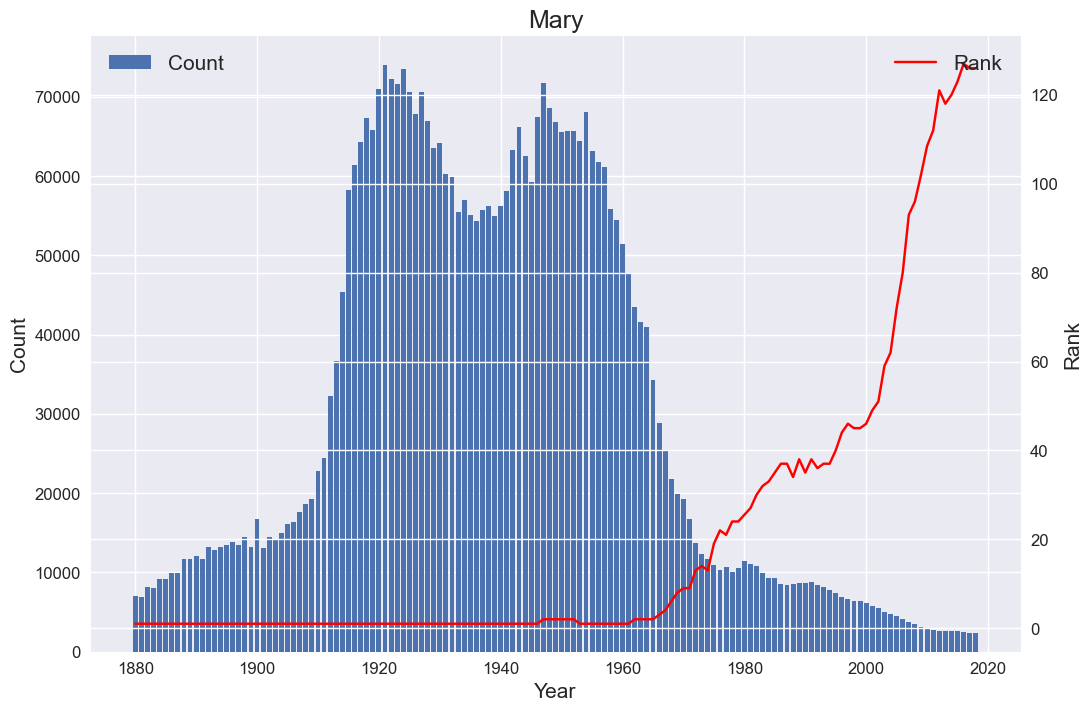

In [64]:
plot_name("Mary", "F", crit = "Count")

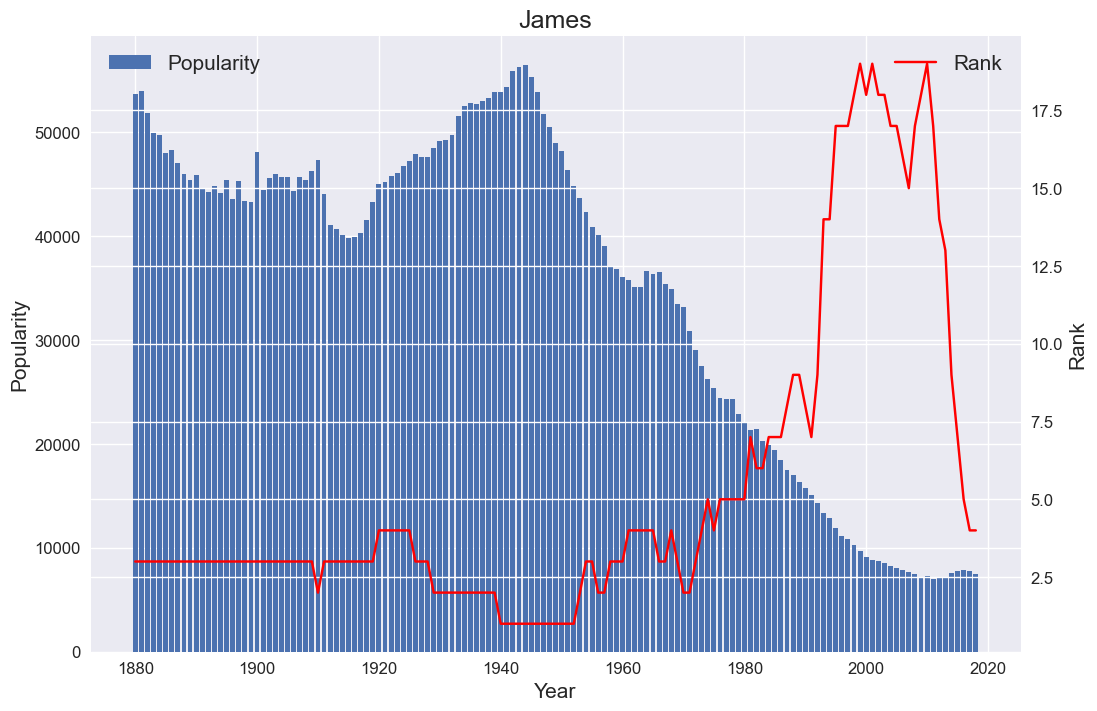

In [65]:
plot_name("James", "M", crit = "Popularity")

16. __Create__ this plot for all __Evergreen Names__ (see Questions 5. and 6.) (a reusable user-defined function might help)

In [66]:
m_evergreen

,Name,Count_1880,Count_2018
0,William,9532,14516
1,James,5927,13525
2,Henry,2444,10649


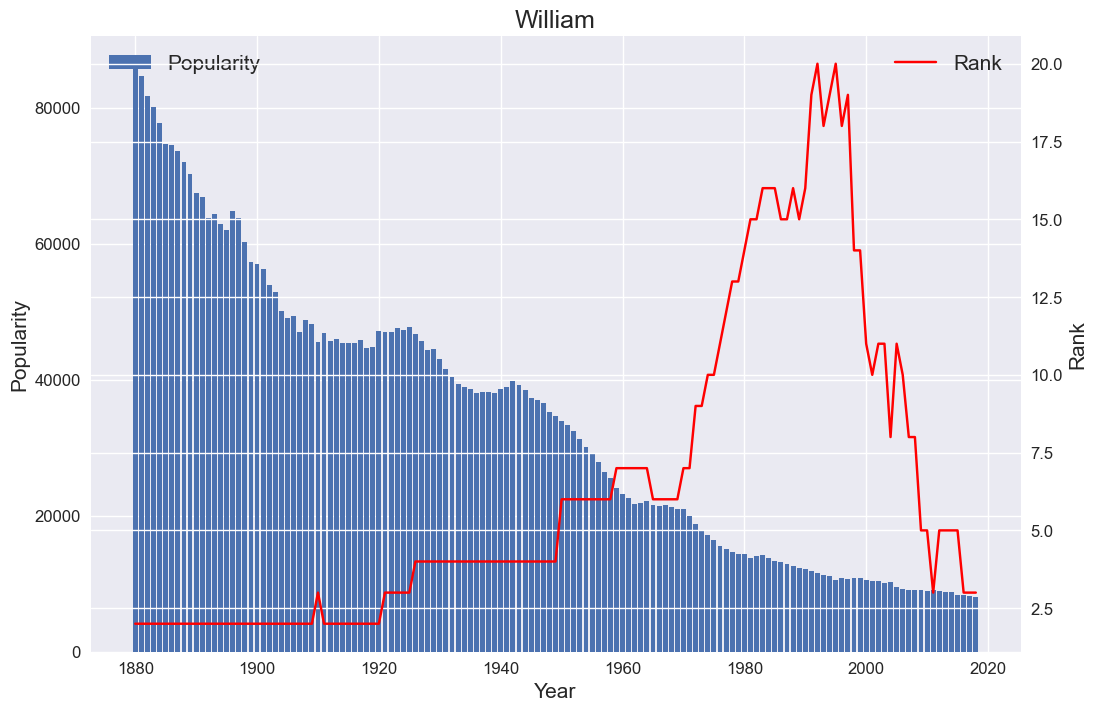

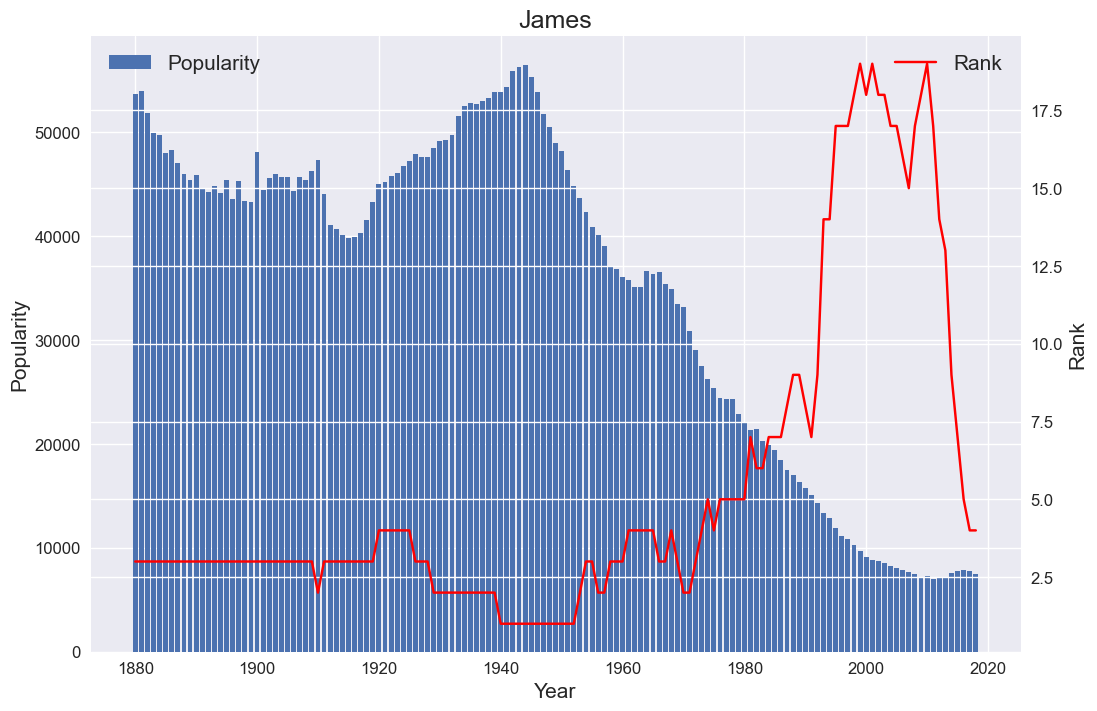

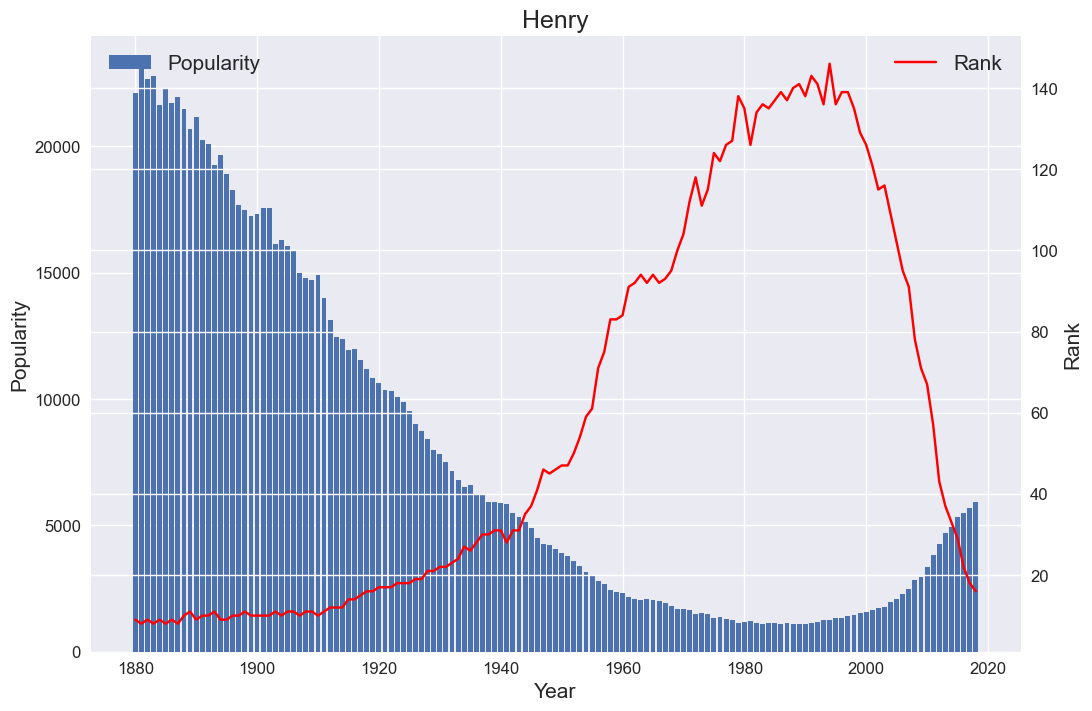

In [67]:
for name in m_evergreen.Name:
    plot_name(name, "M", crit = "Popularity")

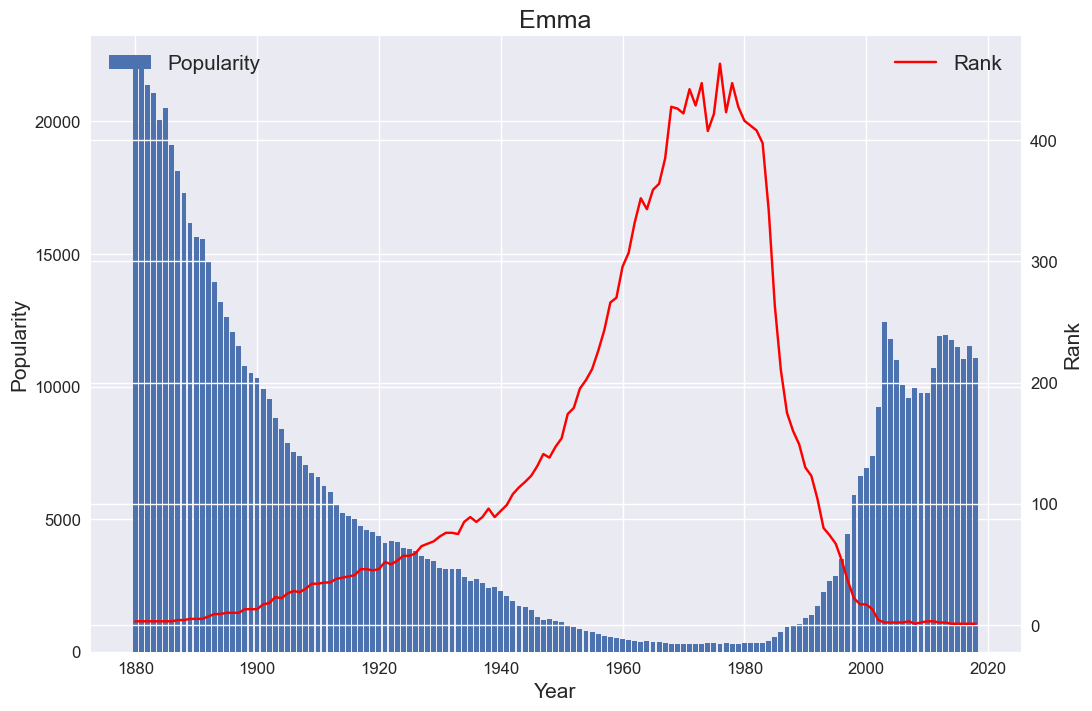

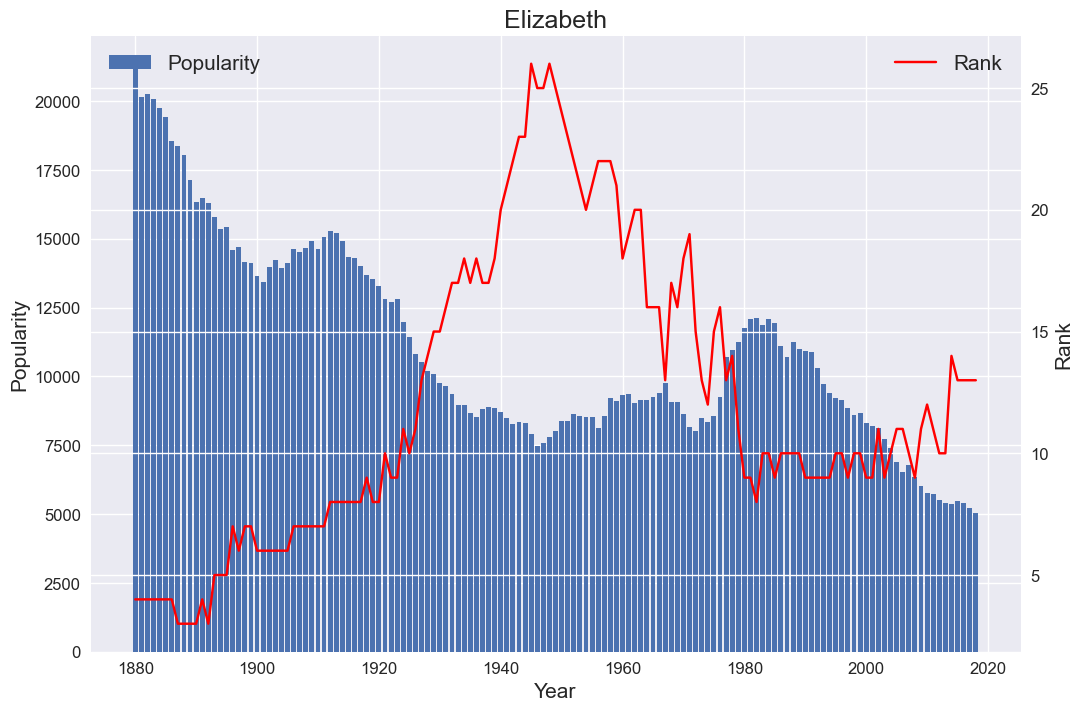

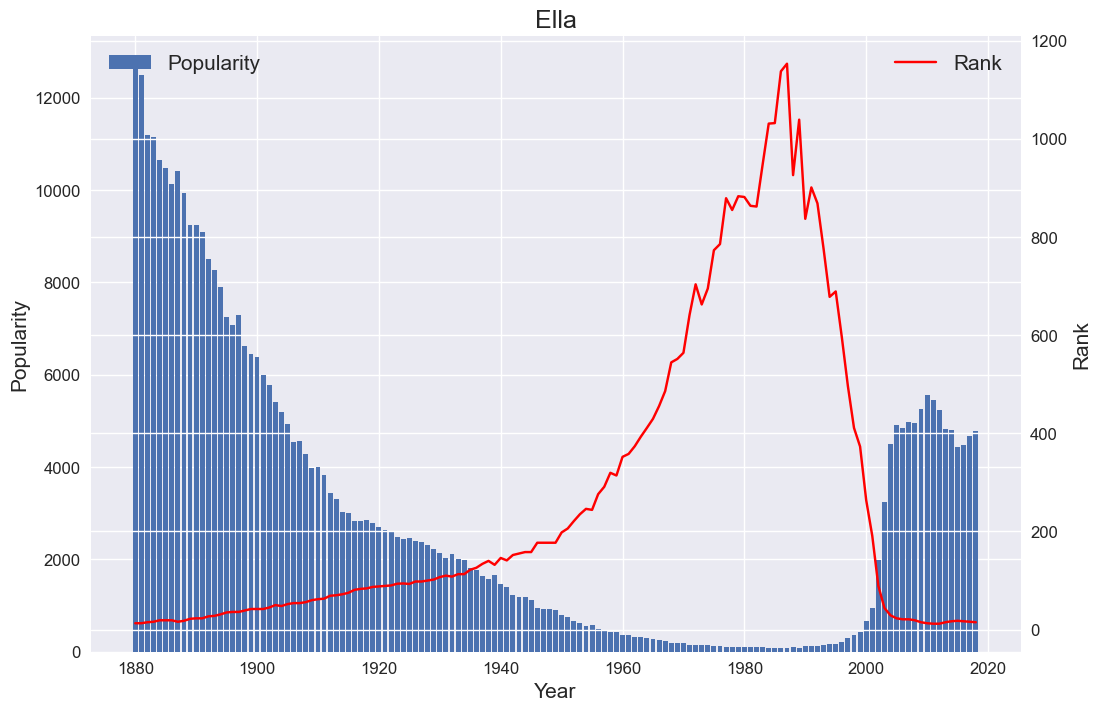

In [68]:
for name in f_evergreen.Name:
    plot_name(name, "F", crit = "Popularity")

## Why does a Name´s Popularity suddenly change? (Part 1)

17. __Add__ the additional columns __"Pop_lag1"__ (Popularity one year ago) and __"Pop_diff"__ (change in popularity from previous year to this year) to df.  

In [69]:
df

,Year,Name,Gender,Count,Popularity,Rank
0,1880,Mary,F,7065,77642,1
1,1880,Anna,F,2604,28617,2
2,1880,Emma,F,2003,22012,3
3,1880,Elizabeth,F,1939,21309,4
4,1880,Minnie,F,1746,19188,5
...,...,...,...,...,...,...
1957041,2018,Zylas,M,5,3,13042
1957042,2018,Zyran,M,5,3,13042
1957043,2018,Zyrie,M,5,3,13042
1957044,2018,Zyron,M,5,3,13042


In [70]:
df.loc[(df.Name == "Mary") & (df.Gender == "F"), "Popularity"].shift()
# [Name & Gender].shift() - Don't include 'Year'

0           NaN
2000      77642
3935      75245
6062      75551
8146      71333
           ... 
1793168    1514
1826414    1477
1859539    1478
1892548    1420
1925138    1397
Name: Popularity, Length: 139, dtype: float64

In [71]:
df.groupby(["Name", "Gender"]).Popularity.shift(periods = 1)
# Don't include 'Year'

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
           ..
1957041     4
1957042     3
1957043     3
1957044     8
1957045     3
Name: Popularity, Length: 1957046, dtype: float64

In [72]:
df["lag1"] = df.groupby(["Name", "Gender"]).Popularity.shift(periods = 1)

In [73]:
df.head()

,Year,Name,Gender,Count,Popularity,Rank,lag1
0,1880,Mary,F,7065,77642,1,NaN
1,1880,Anna,F,2604,28617,2,NaN
2,1880,Emma,F,2003,22012,3,NaN
3,1880,Elizabeth,F,1939,21309,4,NaN
4,1880,Minnie,F,1746,19188,5,NaN


In [74]:
df.Popularity.sub(df.lag1)

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
           ..
1957041    -1
1957042    -0
1957043     0
1957044    -5
1957045     0
Length: 1957046, dtype: float64

In [75]:
df["Pop_diff"] = df.Popularity.sub(df.lag1)

In [76]:
df

,Year,Name,Gender,Count,Popularity,Rank,lag1,Pop_diff
0,1880,Mary,F,7065,77642,1,NaN,NaN
1,1880,Anna,F,2604,28617,2,NaN,NaN
2,1880,Emma,F,2003,22012,3,NaN,NaN
3,1880,Elizabeth,F,1939,21309,4,NaN,NaN
4,1880,Minnie,F,1746,19188,5,NaN,NaN
...,...,...,...,...,...,...,...,...
1957041,2018,Zylas,M,5,3,13042,4,-1
1957042,2018,Zyran,M,5,3,13042,3,-0
1957043,2018,Zyrie,M,5,3,13042,3,0
1957044,2018,Zyron,M,5,3,13042,8,-5


18. __Create__ df2 starting with the __year 1900__ (from 1900 till today).

In [77]:
df2 = df.loc[df.Year >= 1900].copy()
df2

,Year,Name,Gender,Count,Popularity,Rank,lag1,Pop_diff
52265,1900,Mary,F,16706,55724,1,56527,-802
52266,1900,Helen,F,6343,21158,2,21663,-506
52267,1900,Anna,F,6114,20394,3,21951,-1557
52268,1900,Margaret,F,5304,17692,4,18234,-542
52269,1900,Ruth,F,4765,15894,5,16788,-894
...,...,...,...,...,...,...,...,...
1957041,2018,Zylas,M,5,3,13042,4,-1
1957042,2018,Zyran,M,5,3,13042,3,-0
1957043,2018,Zyrie,M,5,3,13042,3,0
1957044,2018,Zyron,M,5,3,13042,8,-5


19. __Filter__ df2 and find the __20 largest values__ in "Pop_diff" (get complete rows).

In [78]:
df2

,Year,Name,Gender,Count,Popularity,Rank,lag1,Pop_diff
52265,1900,Mary,F,16706,55724,1,56527,-802
52266,1900,Helen,F,6343,21158,2,21663,-506
52267,1900,Anna,F,6114,20394,3,21951,-1557
52268,1900,Margaret,F,5304,17692,4,18234,-542
52269,1900,Ruth,F,4765,15894,5,16788,-894
...,...,...,...,...,...,...,...,...
1957041,2018,Zylas,M,5,3,13042,4,-1
1957042,2018,Zyran,M,5,3,13042,3,-0
1957043,2018,Zyrie,M,5,3,13042,3,0
1957044,2018,Zyron,M,5,3,13042,8,-5


In [79]:
df3 = df2.nlargest(20, "Pop_diff")
df3

,Year,Name,Gender,Count,Popularity,Rank,lag1,Pop_diff
431066,1947,Linda,F,99689,56236,1,33547,22689
321479,1935,Shirley,F,42358,40398,2,21874,18524
922468,1983,Ashley,F,33293,19930,4,8775,11156
711426,1971,Jennifer,F,56783,34134,1,26403,7730
726721,1972,Jennifer,F,63603,41813,1,34134,7680
312301,1934,Shirley,F,22840,21874,4,14203,7671
645417,1966,Michelle,F,27151,16047,4,9186,6861
751941,1973,Jason,M,46683,29940,3,23081,6859
844807,1979,Amanda,F,31928,19890,3,13394,6496
696647,1970,Jennifer,F,46157,26403,1,19978,6425


20. __Create__ the popularity/rank plot (see 15. and 16.) for the Names filtered in 19.

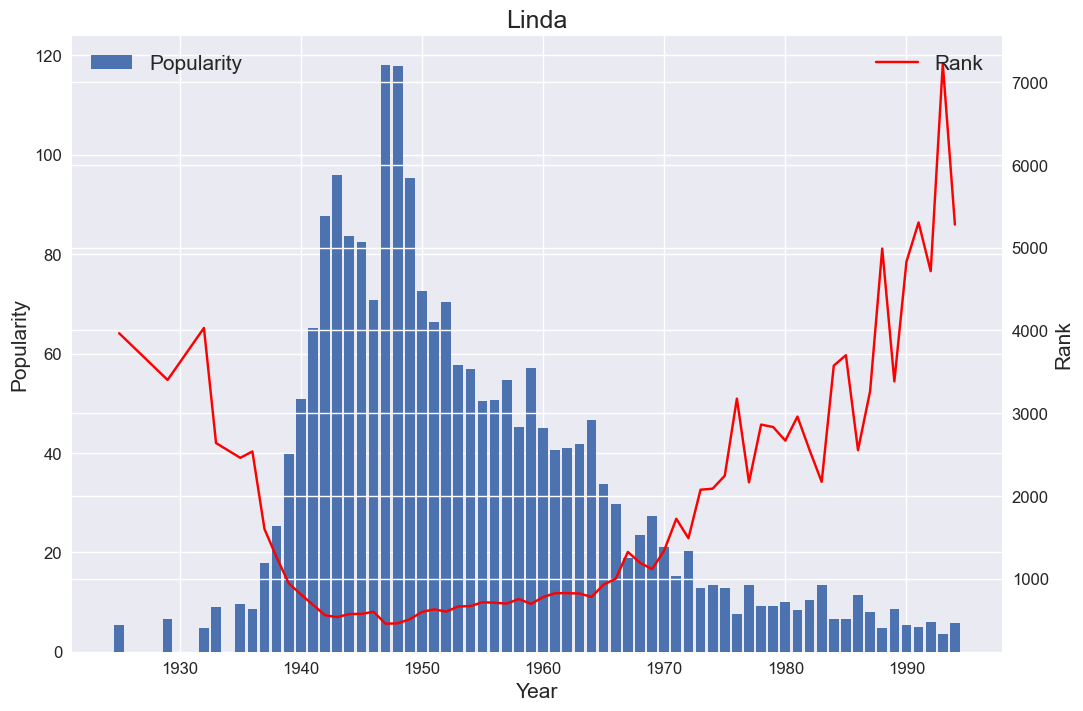

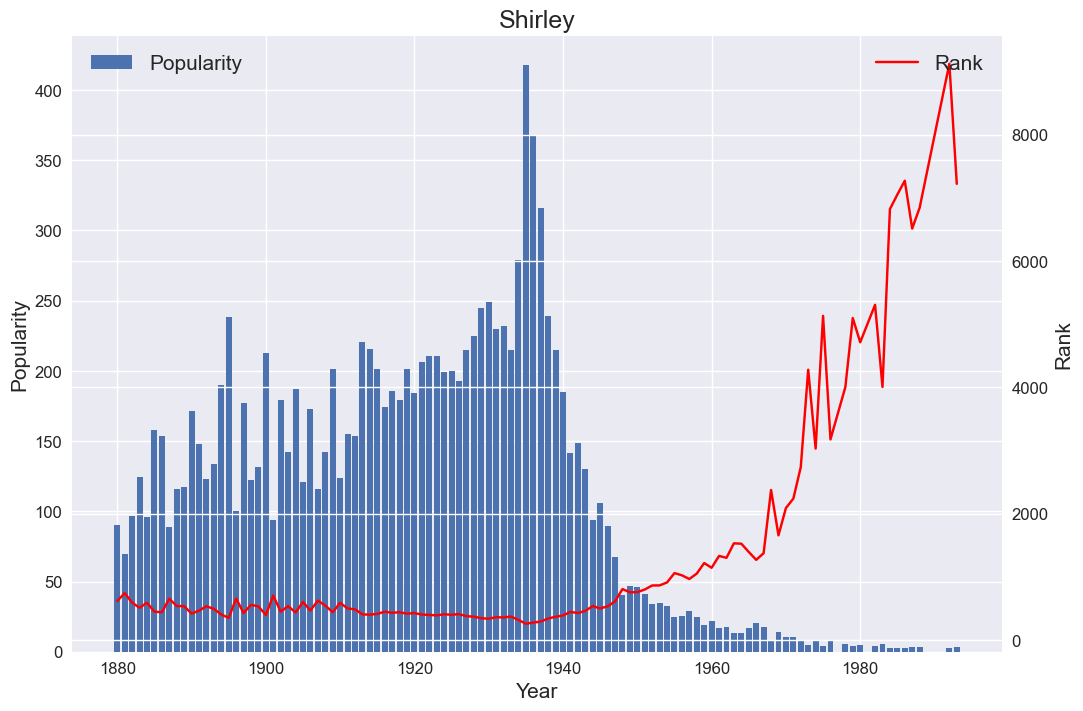

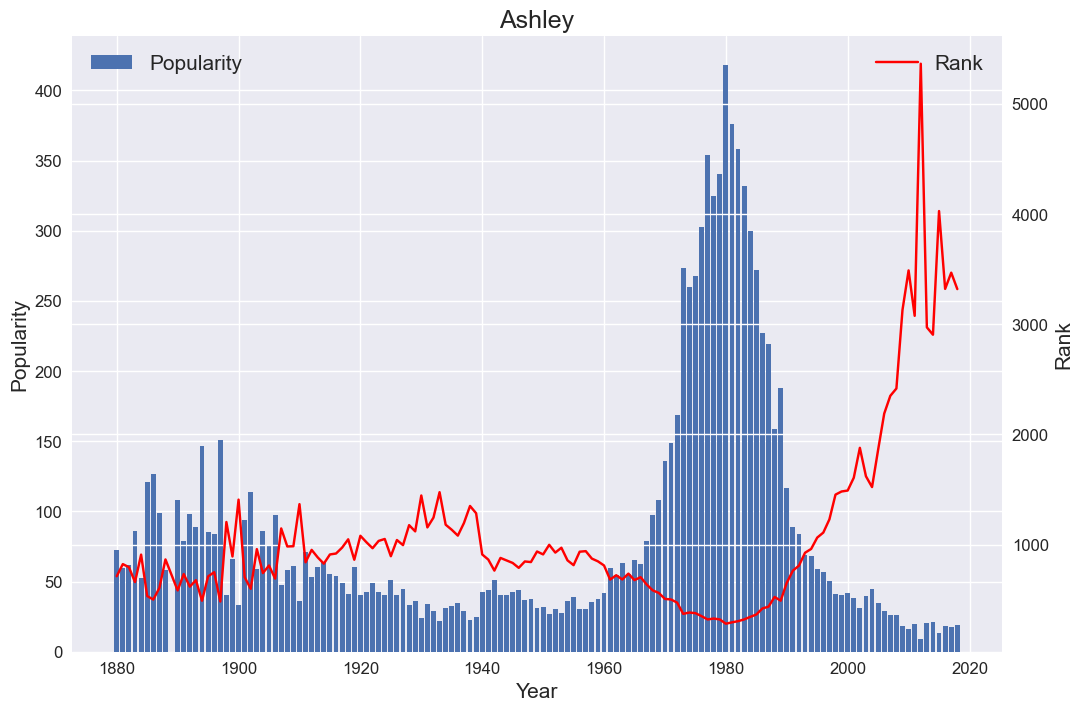

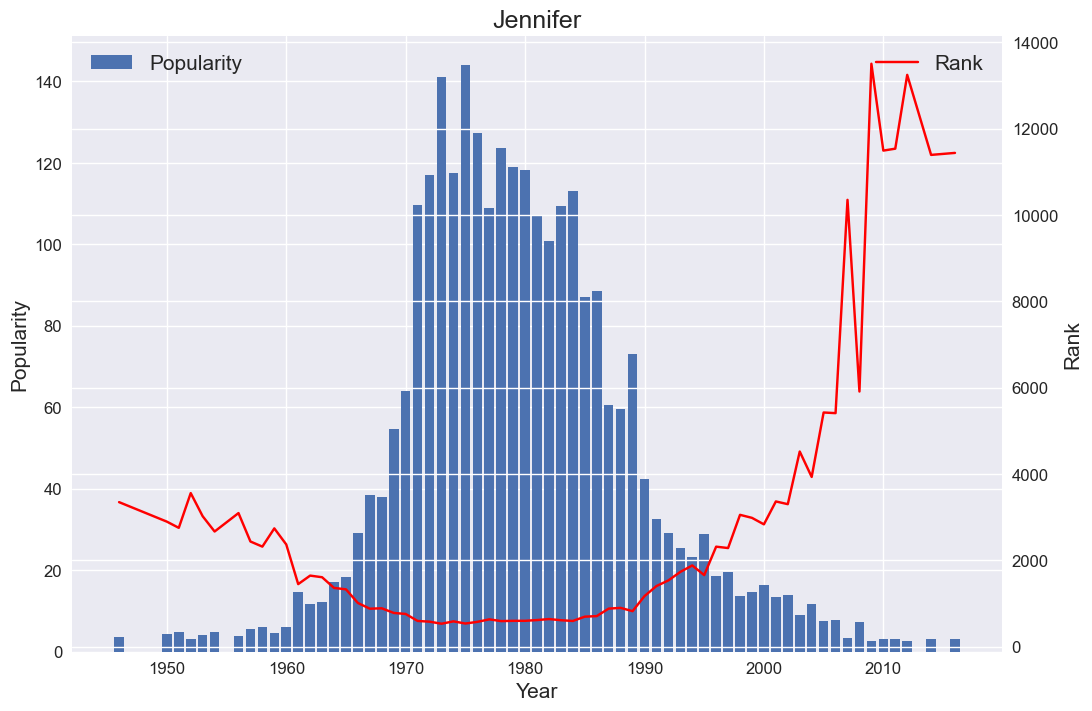

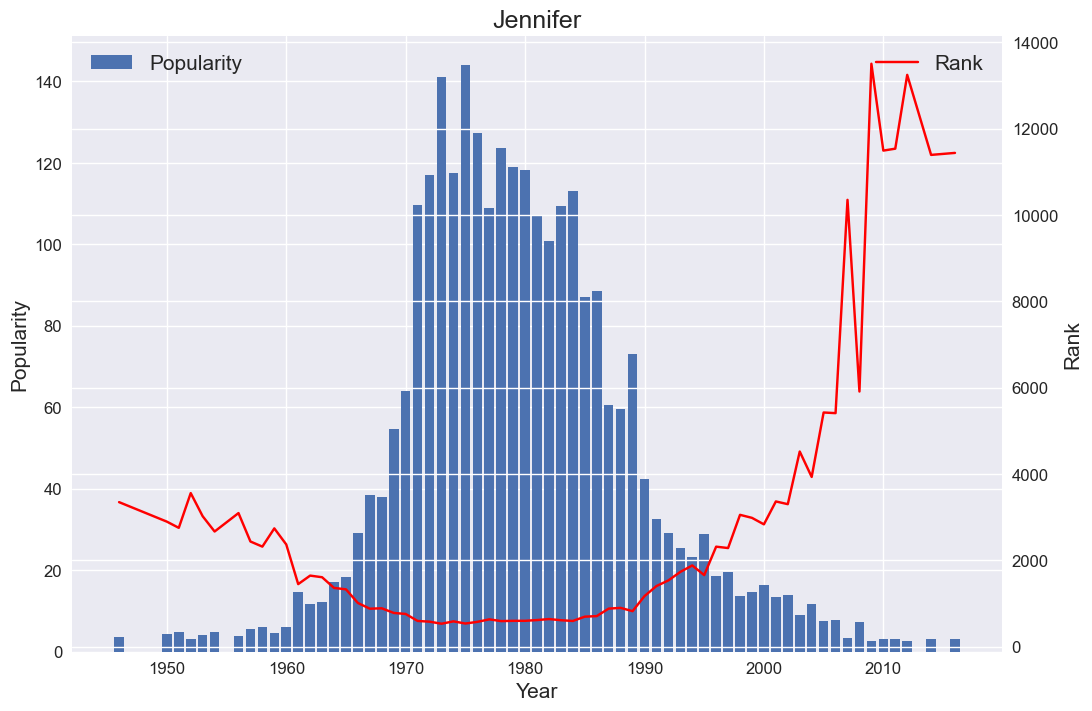

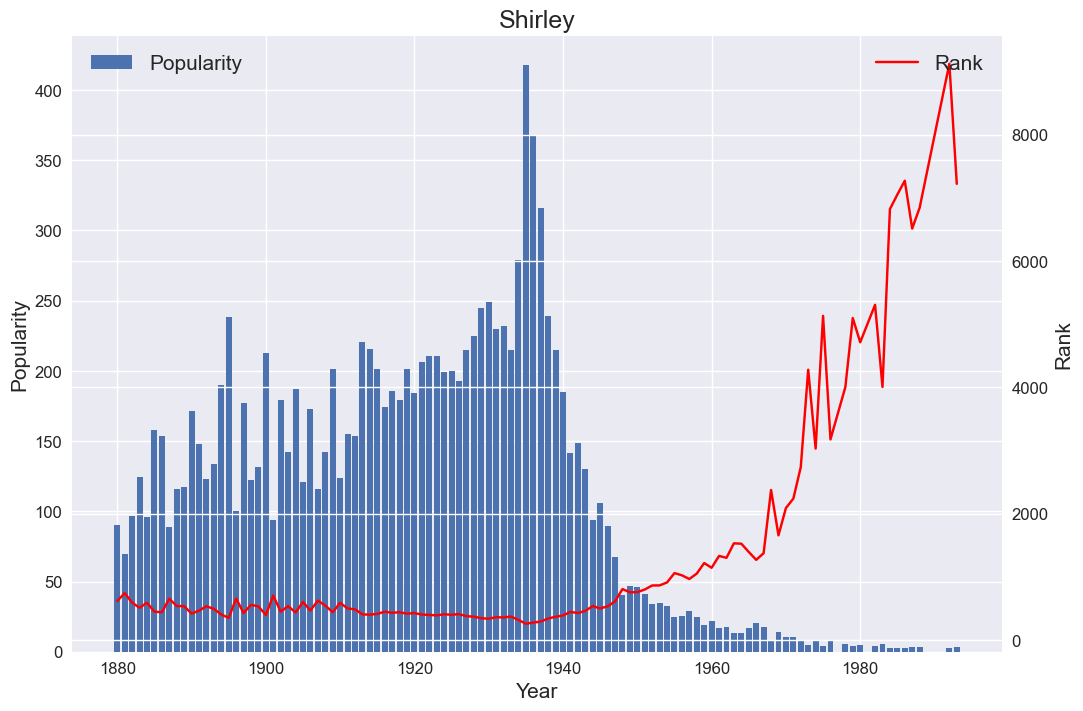

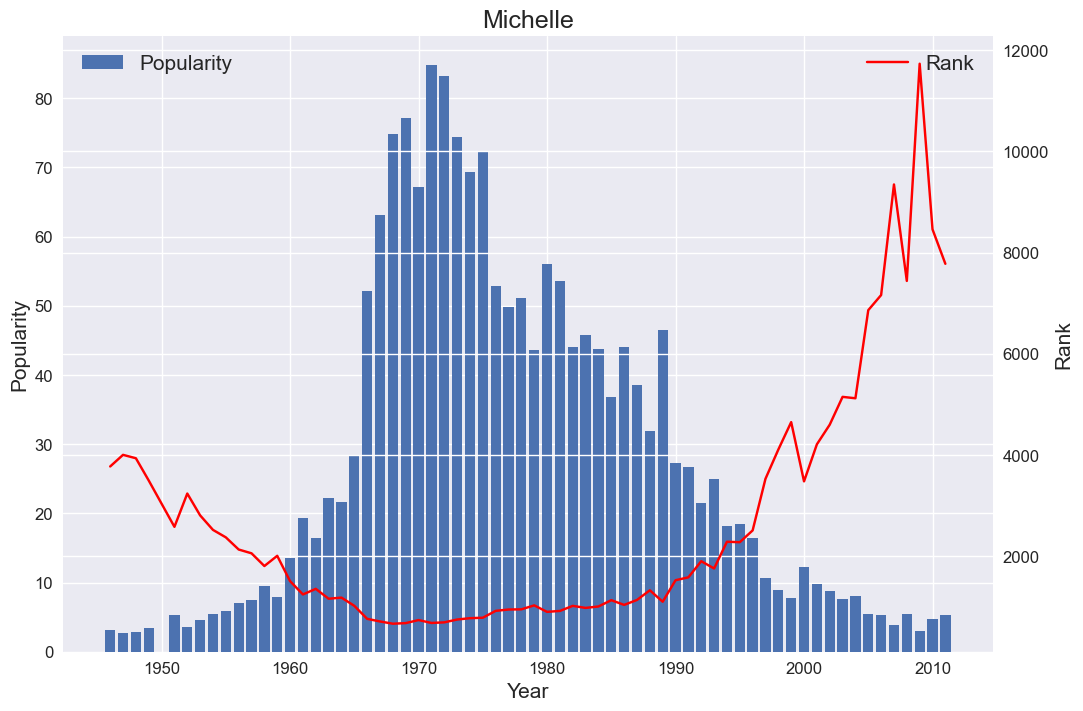

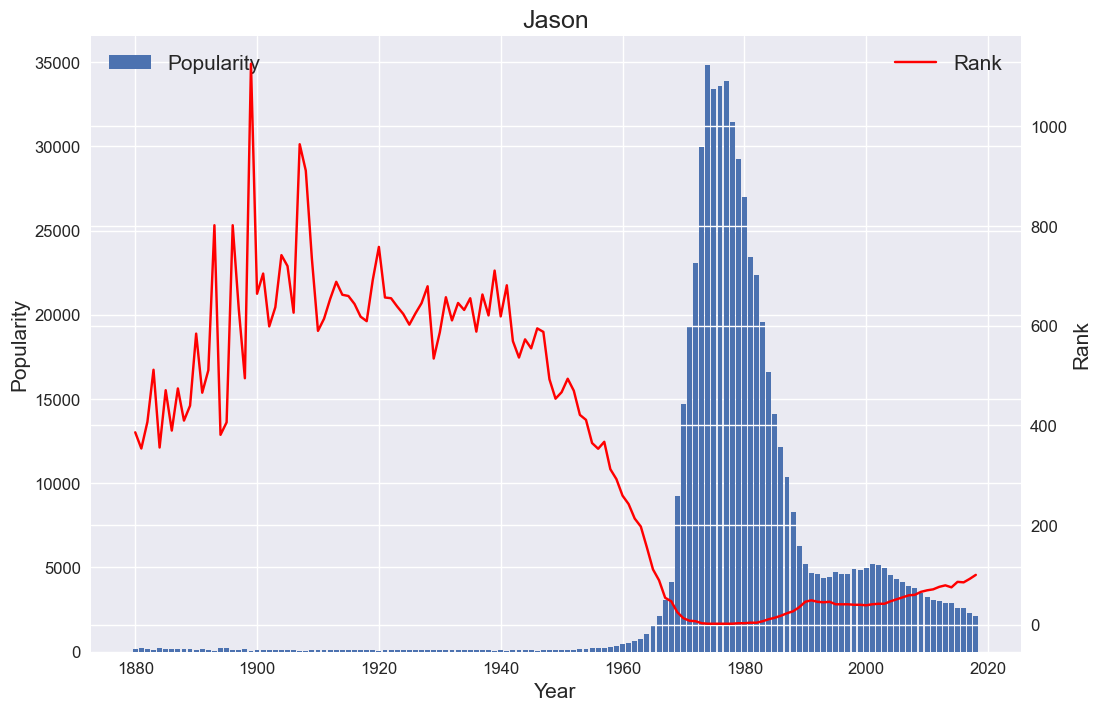

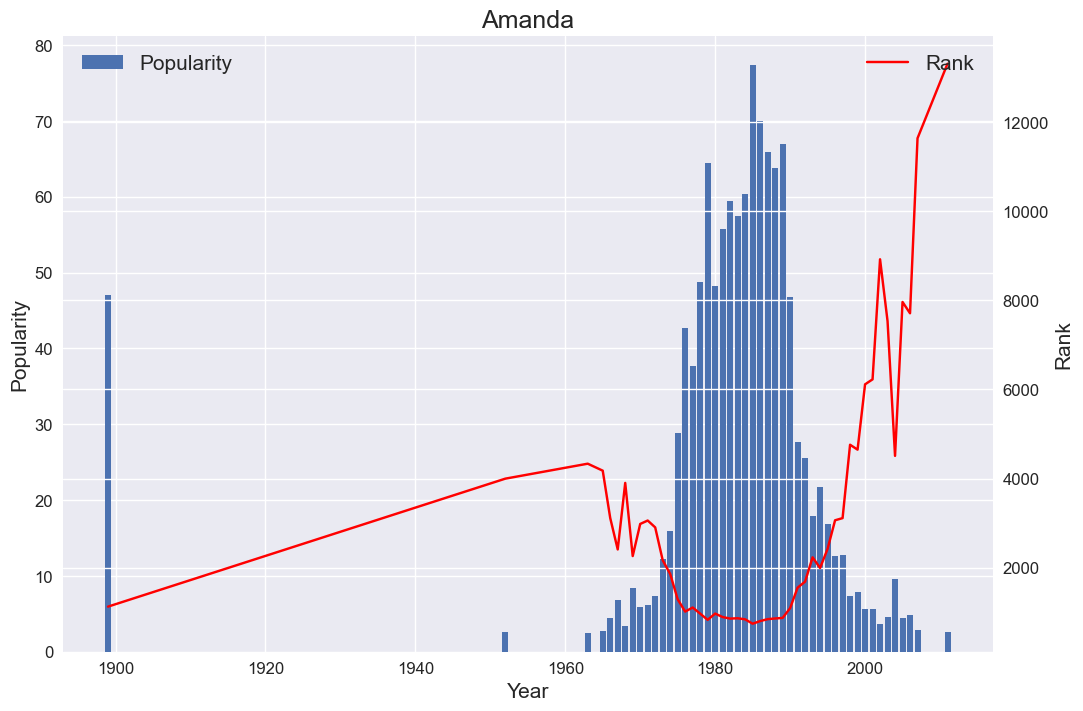

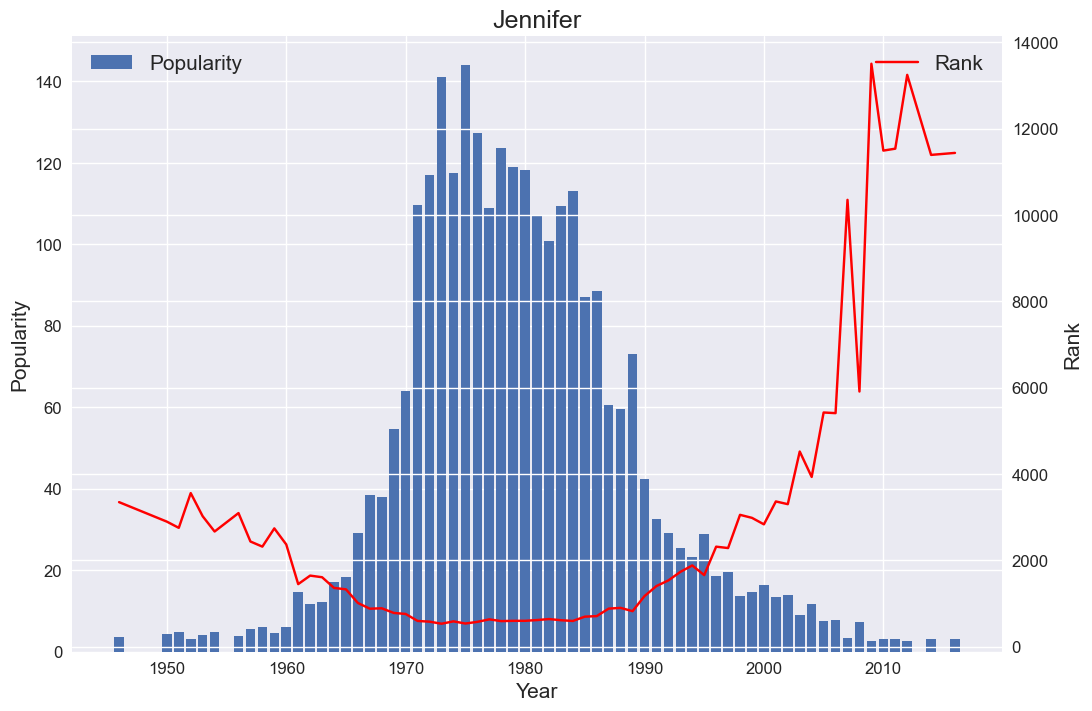

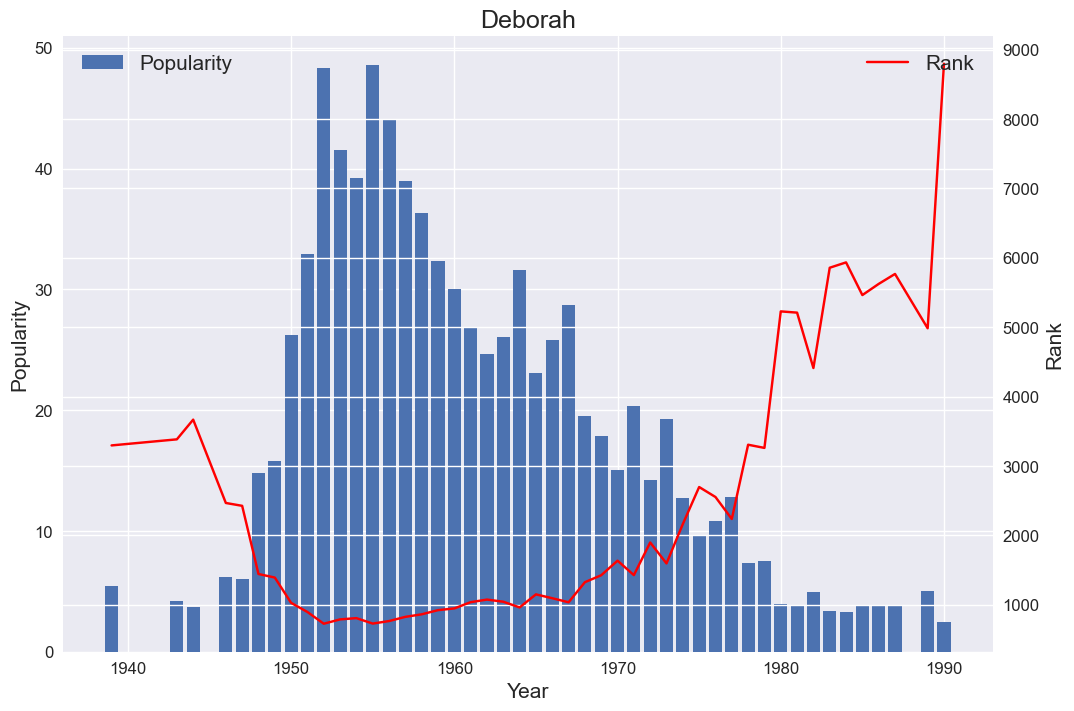

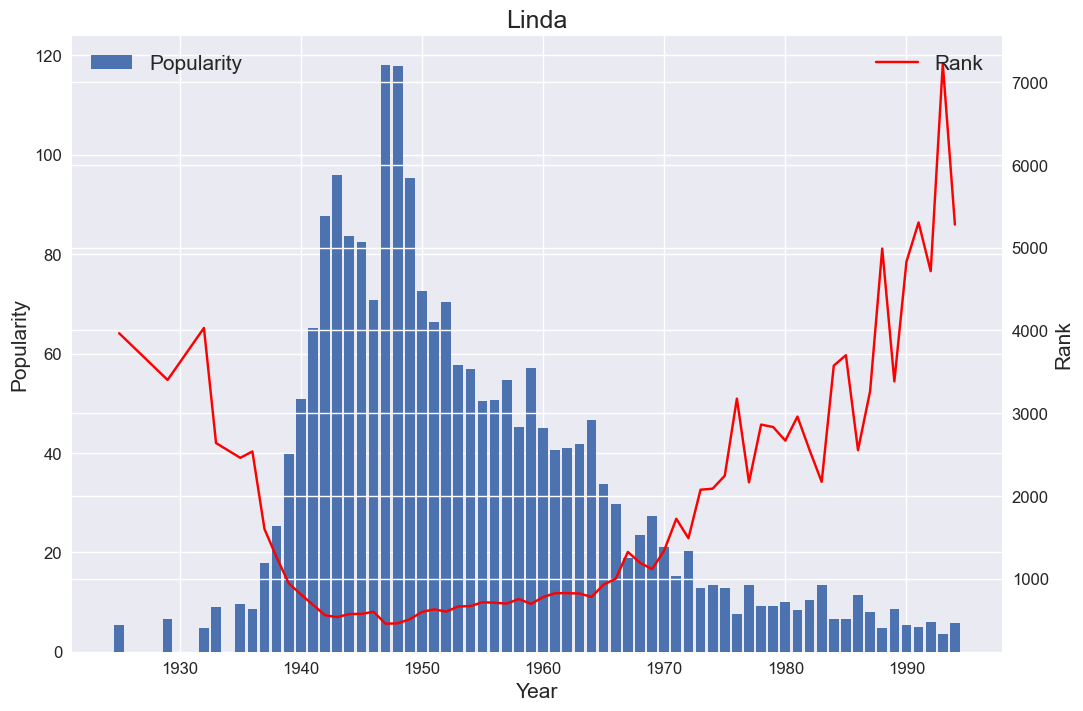

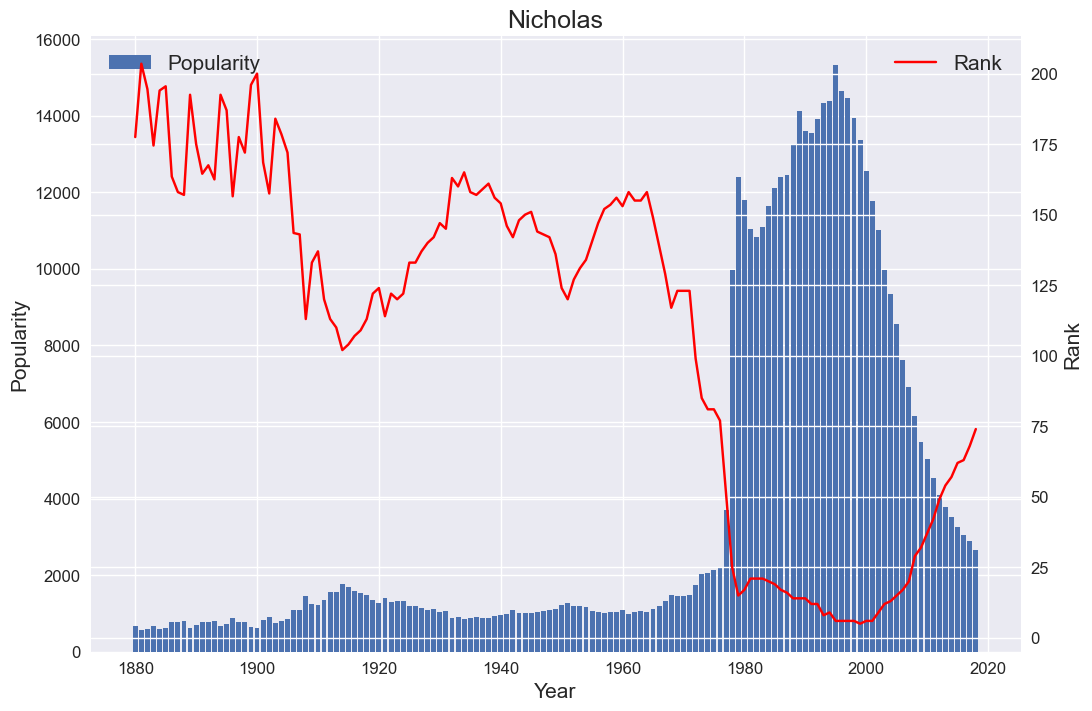

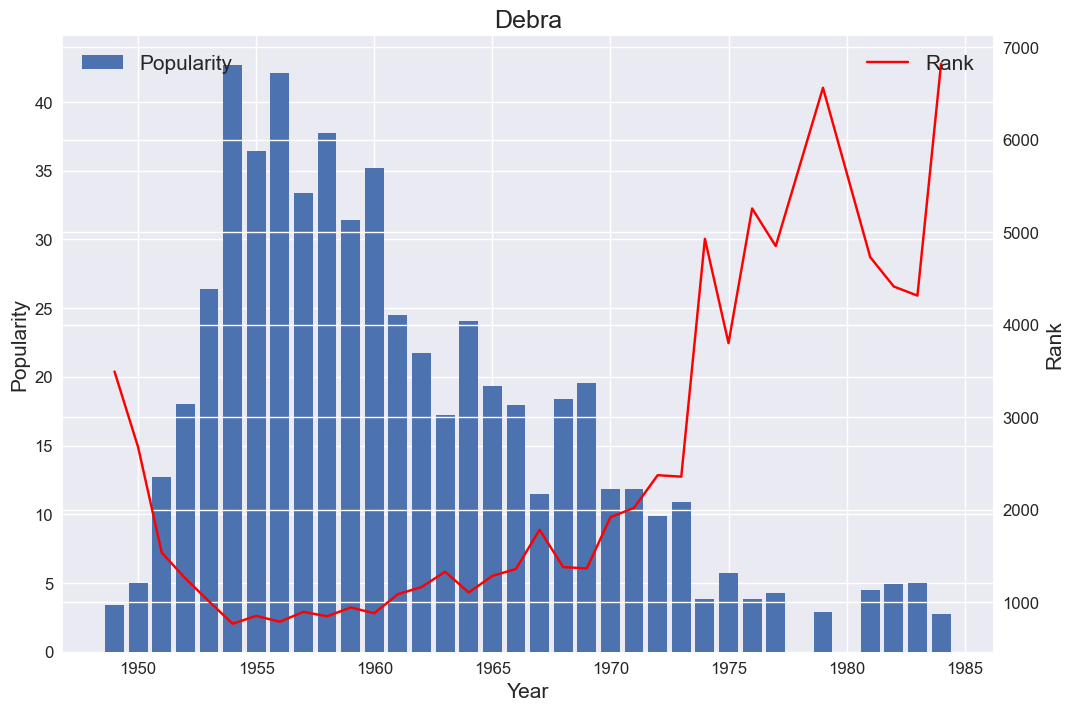

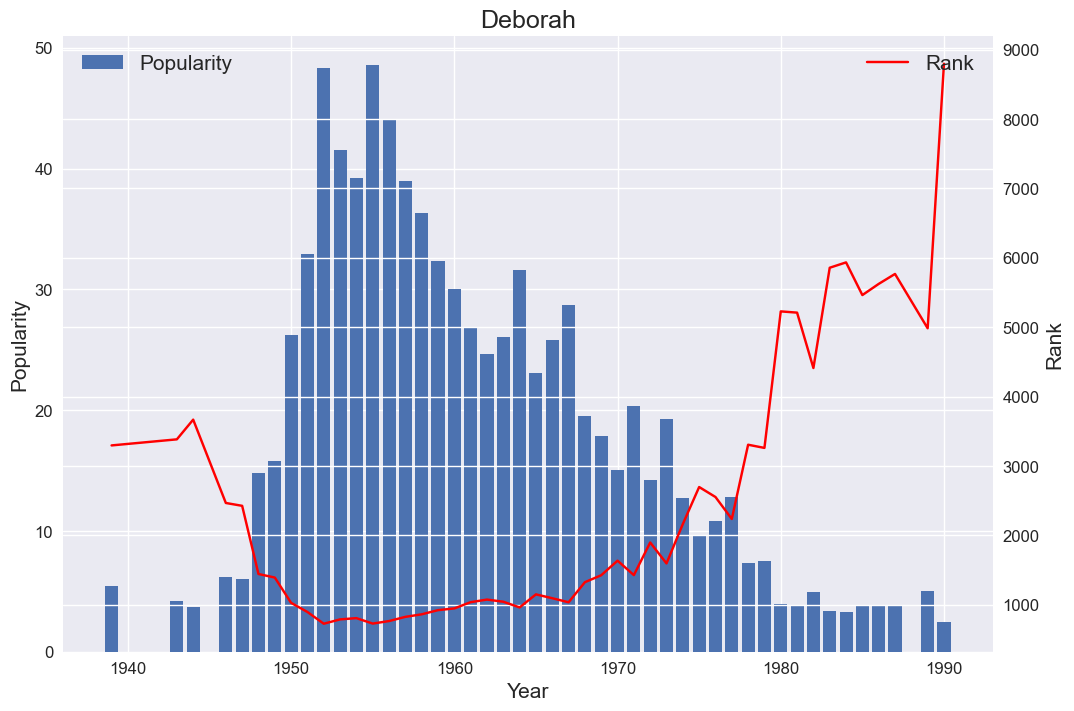

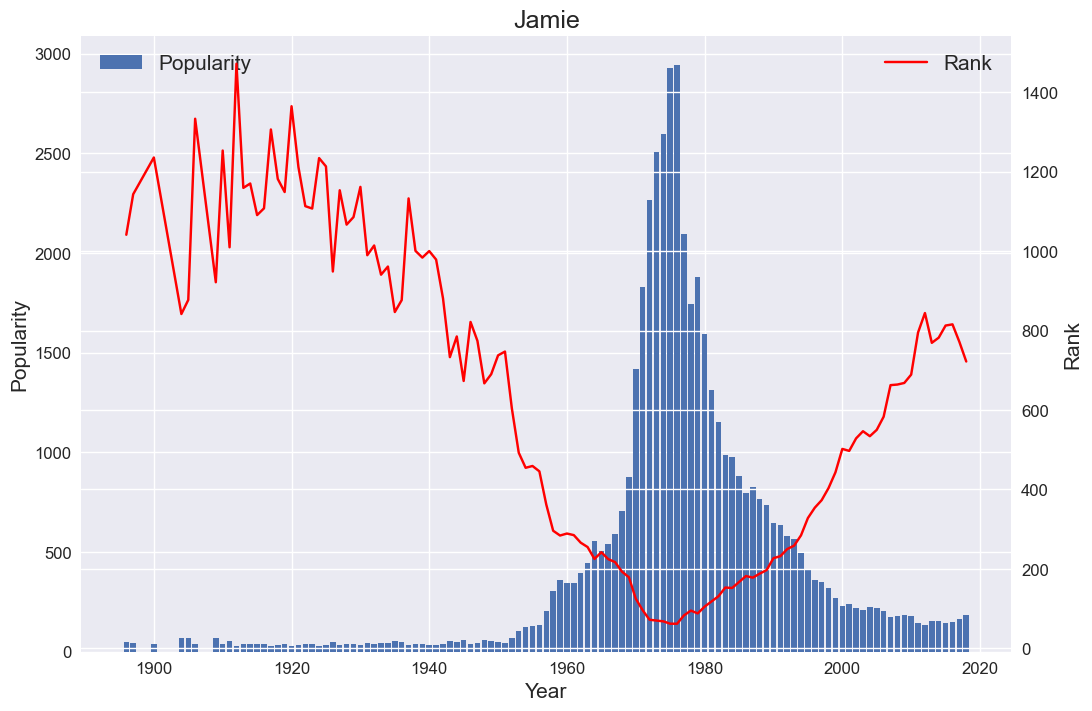

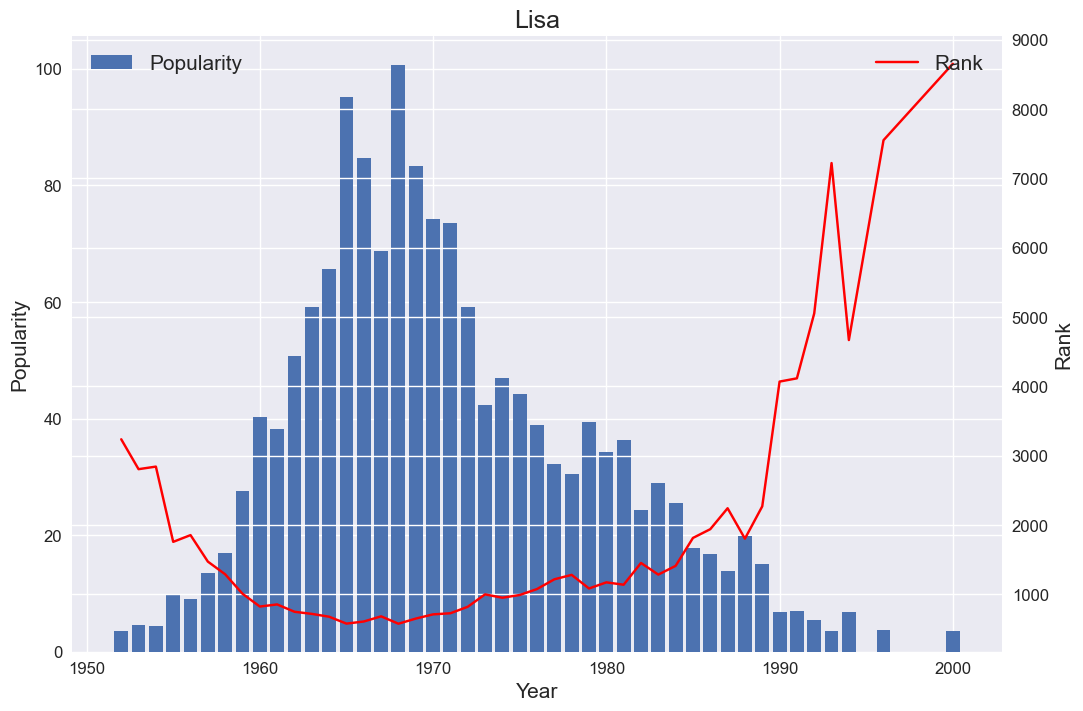

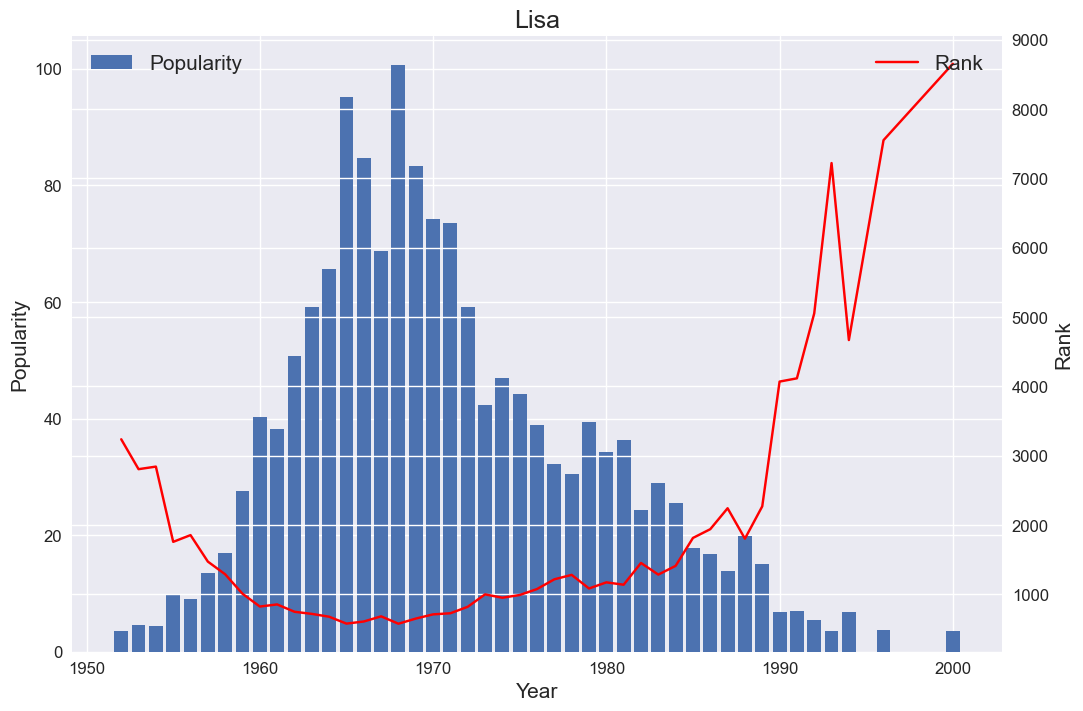

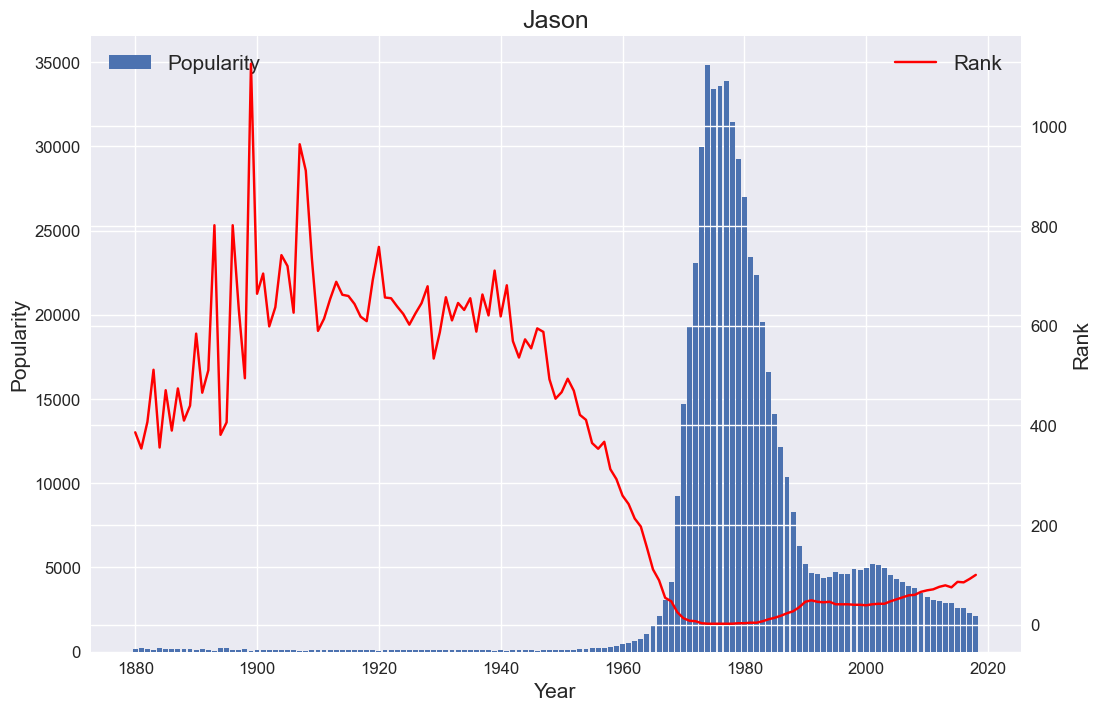

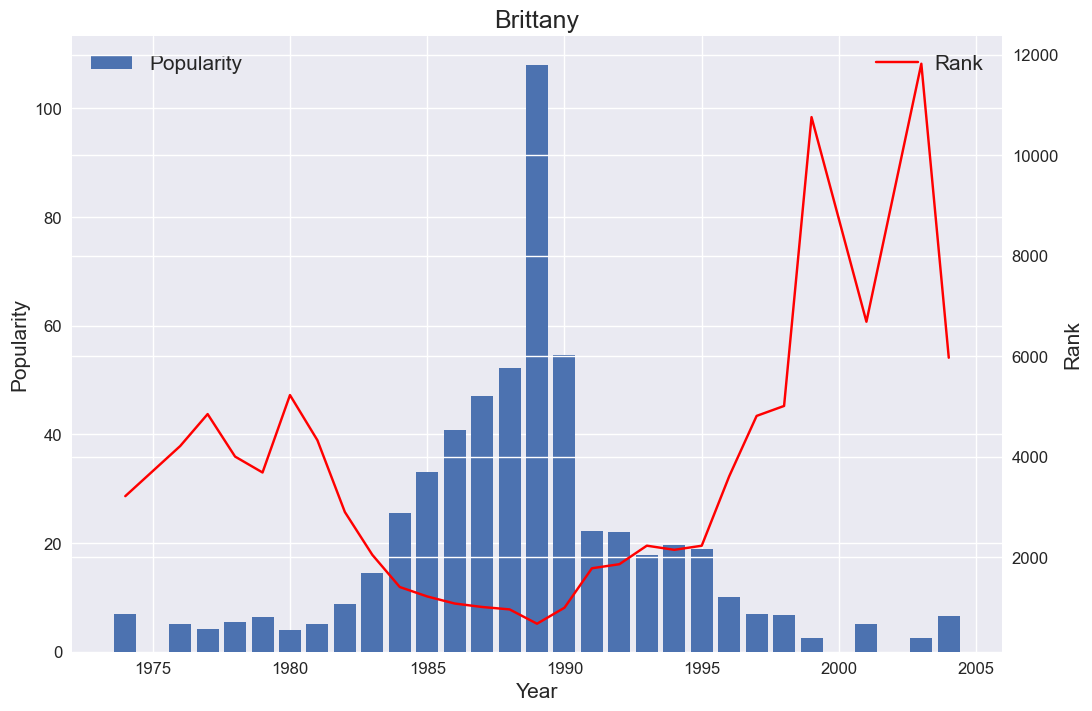

In [80]:
for name in df3.Name:
    plot_name(name, "M", crit = "Popularity")

21. __Search__ the Web for the Names __"Linda"__, __"Shirley"__ and __"Jason"__ and __find out__ why the popularity suddenly changed/spiked.

## Most Popular Unisex Names

22. __Find__ the most popular __Unisex Names__ of all times. (Unisex names are names given to Boys and Girls).  

In [81]:
df

,Year,Name,Gender,Count,Popularity,Rank,lag1,Pop_diff
0,1880,Mary,F,7065,77642,1,NaN,NaN
1,1880,Anna,F,2604,28617,2,NaN,NaN
2,1880,Emma,F,2003,22012,3,NaN,NaN
3,1880,Elizabeth,F,1939,21309,4,NaN,NaN
4,1880,Minnie,F,1746,19188,5,NaN,NaN
...,...,...,...,...,...,...,...,...
1957041,2018,Zylas,M,5,3,13042,4,-1
1957042,2018,Zyran,M,5,3,13042,3,-0
1957043,2018,Zyrie,M,5,3,13042,3,0
1957044,2018,Zyron,M,5,3,13042,8,-5


- Good approach but not correct

In [82]:
df[["Name", "Gender"]].value_counts().sort_values(ascending = False).unstack()
# the number of each name's appearance in each gender, not total count

Gender,F,M
Name,,
Aaban,NaN,11
Aabha,5,NaN
Aabid,NaN,3
Aabidah,1,NaN
Aabir,NaN,2
...,...,...
Zyvion,NaN,1
Zyvon,NaN,1
Zyyanna,1,NaN


In [83]:
df3 = pd.crosstab(index = df.Name, columns = df.Gender, margins = True, margins_name= "Total")
df3
# the number of each name's appearance in each gender, not total count

Gender,F,M,Total
Name,,,
Aaban,0,11,11
Aabha,5,0,5
Aabid,0,3,3
Aabidah,1,0,1
Aabir,0,2,2
...,...,...,...
Zyvon,0,1,1
Zyyanna,1,0,1
Zyyon,0,1,1


In [84]:
df3[["Total", "F", "M"]].sort_values(by = ["Total", "F", "M"], ascending = False)
# the number of each name's appearance in each gender, not total count

Gender,Total,F,M
Name,,,
Total,1957046,1156527,800519
Francis,278,139,139
James,278,139,139
Jean,278,139,139
Jesse,278,139,139
...,...,...,...
Zytaevius,1,0,1
Zytavion,1,0,1
Zyvion,1,0,1


- Correct approach

In [85]:
df4 = df.groupby(["Name", "Gender"]).Count.sum().unstack()
df4
# the number of each name's count in each gender

Gender,F,M
Name,,
Aaban,NaN,114
Aabha,35,NaN
Aabid,NaN,16
Aabidah,5,NaN
Aabir,NaN,10
...,...,...
Zyvion,NaN,5
Zyvon,NaN,7
Zyyanna,6,NaN


In [86]:
df4.sum(axis=1)

Name
Aaban     114
Aabha      35
Aabid      16
Aabidah     5
Aabir      10
           ..
Zyvion      5
Zyvon       7
Zyyanna     6
Zyyon       6
Zzyzx      10
Length: 98400, dtype: float64

In [87]:
df4["Total"] = df4.sum(axis=1)

In [88]:
df4

Gender,F,M,Total
Name,,,
Aaban,NaN,114,114
Aabha,35,NaN,35
Aabid,NaN,16,16
Aabidah,5,NaN,5
Aabir,NaN,10,10
...,...,...,...
Zyvion,NaN,5,5
Zyvon,NaN,7,7
Zyyanna,6,NaN,6


In [89]:
df4[["Total", "F", "M"]].sort_values(by = ["Total", "F", "M"], ascending = False)

Gender,Total,F,M
Name,,,
James,5187679,23399,5164280
John,5146508,21691,5124817
Robert,4840228,20099,4820129
Michael,4384463,21732,4362731
Mary,4140840,4125675,15165
...,...,...,...
Zyrese,5,NaN,5
Zysean,5,NaN,5
Zytaevius,5,NaN,5


In [90]:
df4.dropna(inplace = True)

In [91]:
df4

Gender,F,M,Total
Name,,,
Aaden,5,4828,4833
Aadi,16,851,867
Aadyn,16,516,532
Aalijah,149,212,361
Aaliyah,87442,96,87538
...,...,...,...
Zyion,168,918,1086
Zyon,620,2638,3258
Zyonn,5,40,45


In [92]:
df4.min(axis = 1)
# Return the minimum of the values over the vertical(axis = 1) axis.
# For each name we get the minimum count among the boys and the girls' variant.
# Apply min() method for each row all along the columns.

Name
Aaden       5
Aadi       16
Aadyn      16
Aalijah   149
Aaliyah    96
           ..
Zyion     168
Zyon      620
Zyonn       5
Zyree      16
Zyrie      16
Length: 10773, dtype: float64

In [93]:
df4.min(axis = 1).sort_values(ascending = False)

Name
Willie   146156
Jordan   131004
Leslie   112726
Taylor   110390
Jessie   110212
          ...  
Hany          5
Hao           5
Haram         5
Harjap        5
Aaden         5
Length: 10773, dtype: float64